# Выводы

1. В данном датасете данные являются нескоррелированными. Таким образом применение методов понижения размерности является нецелесообразным.

2. В данном датасете наблюдается существенный дисбаланс классов(Экземпляров данных с заболеваниями сердца примерно 8.5%). Таким образом, необходимо отбалансировать классы либо методом усечения данных, либо генерацией синтетических данных. Выбор конкретного метода балансирования классов является предметом дальнейших исследований

3. Признаки так же являются существено несбалансированными.

    3.1 Наиболее информативными являются следующие признаки: Возрастная категория, общее состояние здоровья, перенесеный инсульт, заболевания почек, проблемы с ходьбой.
    
    3.2 Наименее информативными являются следующие признаки: Наличие астмы, половая принадлежность, употребление алкоголя
    
4. Все признаки, за исключением употребления алкоголя естественным образом влияют на возникновение заболеваний сердца

    4.1 Аномальное влияение употребления алкоголя на возникновение заболеваний сердца может быть объяснено следующими соображениями:
    
        a) Количество людей употребляющих алкоголь является крайне невысоким(~7%)
        б) Распределение по возростным категориям людей, употребляющих алкоголь, смещено в сторону молодых, среди которых редко встречаются заболевания сердца
        
5. Заниметельные факты:

    Курение повышает риск развития заболеваний сердца в 2 раза.
    
    Инсульт повышает риск развития заболеваний сердца в 5 раз.
    
    Проблемы с ходьбой повышает риск развития заболеваний сердца в 3.5 раза.
    
    У мужчин сердечные заболевания встречаются в 1.5 раза чаще чем у женщин.
    
    Риск развития сердечных заболеваний растет экспоненциальным образом с возрастом.
    
    У азиатов риск развития заболеваний сердца в 3 раза меньше чем у американских индейцев.
    
    Наличие диабета увеличивает риск развития заболеваний сердца в 3.5 раза.
    
    Высокая физическая активность уменьшает риск развития заболеваний сердца в 2 раза.
    
    Заболевания почек увеличивает риск развития заболеваний сердца в 3.5 раза.
    
    Перенесеный рак кожи увеличивает риск развития заболеваний сердца в 2 раза.

# Технические ячейки

In [1]:
import pandas as pd
import sklearn as ask
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statistics
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [3]:
dfnumstat = df.describe(include=[np.number])
dfnumstat

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [4]:
dfcatstat = df.describe(include=[object]) 
dfcatstat

HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex  \
count        319795  319795          319795  319795      319795  319795   
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292422  187887          298018  307726      275385  167805   

       AgeCategory    Race Diabetic PhysicalActivity  GenHealth  Asthma  \
count       319795  319795   319795           319795     319795  319795   
unique          13       6        4                2          5       2   
top          65-69   White       No              Yes  Very good      No   
freq         34151  245212   269653           247957     113858  276923   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976

In [5]:
print(df.AgeCategory.unique())
print(df.Race.unique())
print(df.Diabetic.unique())
print(df.GenHealth.unique())

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [6]:
yes_count = len(df[df['HeartDisease']=='Yes'])
no_count = len(df) - yes_count
print("\n Всего больезней сердца:",yes_count,"\n","Всего здоровых сердец:",no_count)


 Всего больезней сердца: 27373 
 Всего здоровых сердец: 292422


In [7]:
298018/319795

0.9319032505198643

# EDA

## Общие данные о данных

### Race

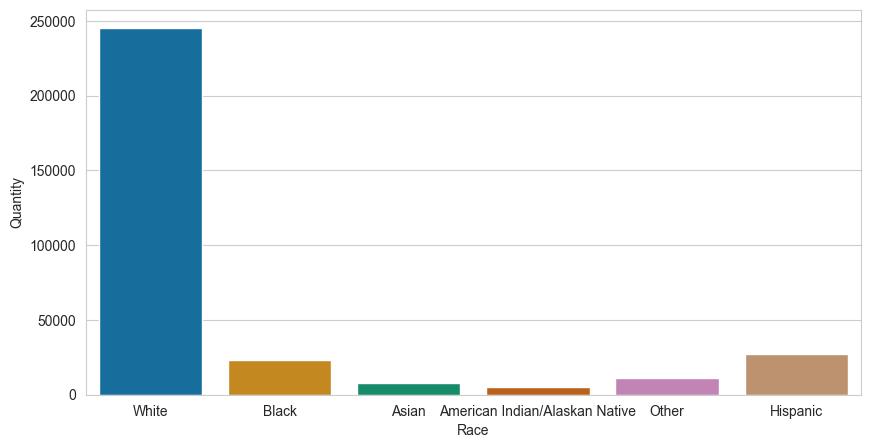

In [8]:
fig = plt.figure(figsize=(10,5), dpi= 100)
sns.set_style('whitegrid')
sns.countplot(x='Race',data=df,palette='colorblind')
plt.xlabel("Race")
plt.ylabel("Quantity")
plt.show() 

### Age Category

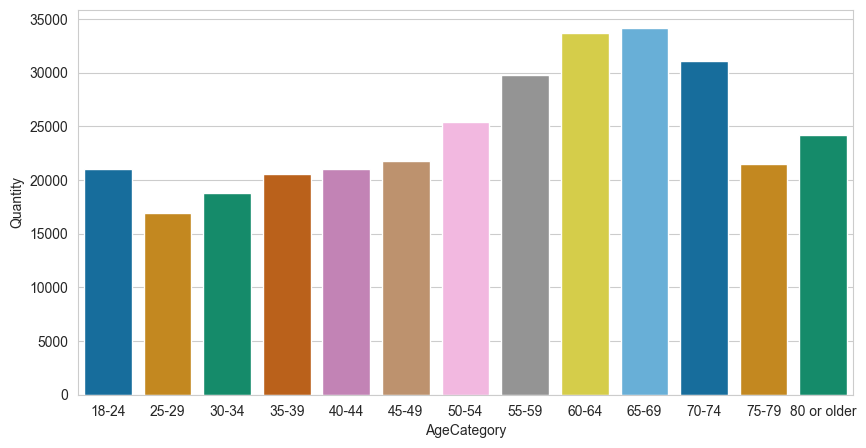

In [9]:
a = df['AgeCategory'].unique()
fig = plt.figure(figsize=(10,5), dpi= 100)
sns.set_style('whitegrid')
sns.countplot(x='AgeCategory',data=df,palette='colorblind', order = sorted(a))
plt.xlabel("AgeCategory")
plt.ylabel("Quantity")
plt.show() 

### Genetic Health

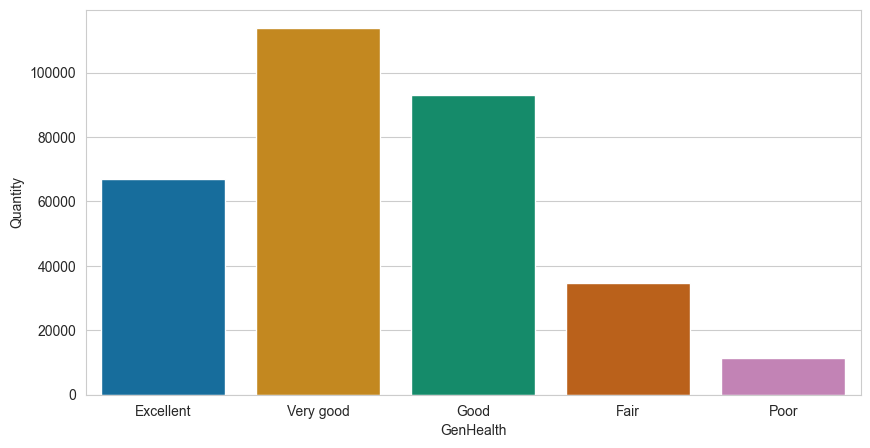

In [10]:
a = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
fig = plt.figure(figsize=(10,5), dpi= 100)
sns.set_style('whitegrid')
sns.countplot(x='GenHealth',data=df,palette='colorblind', order = a)
plt.xlabel("GenHealth")
plt.ylabel("Quantity")
plt.show() 

### Others

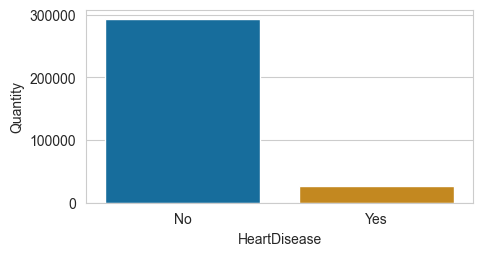

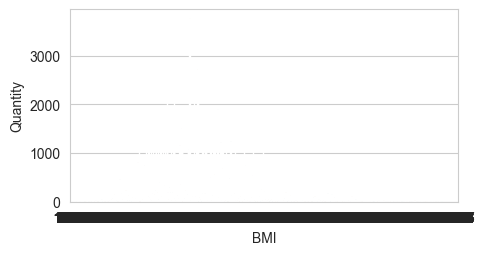

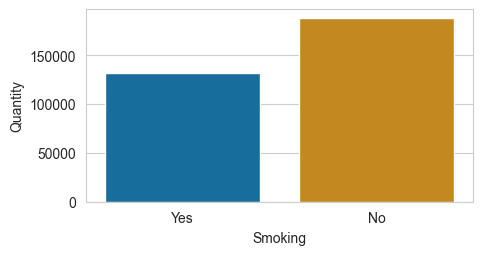

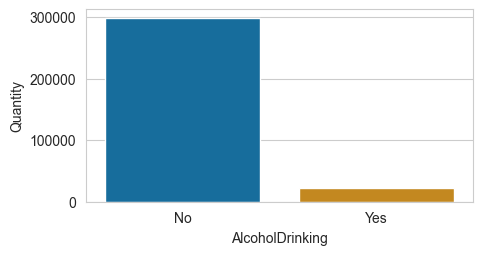

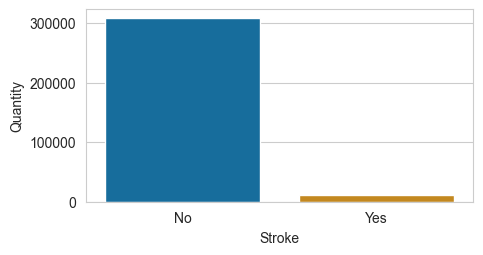

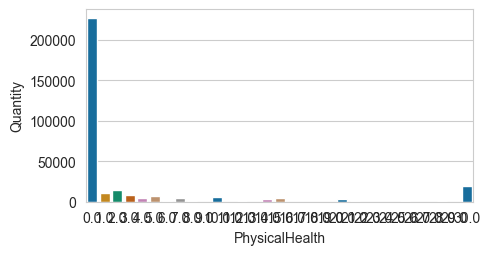

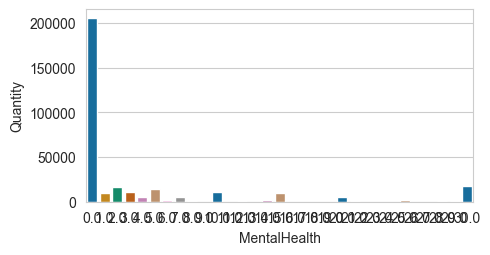

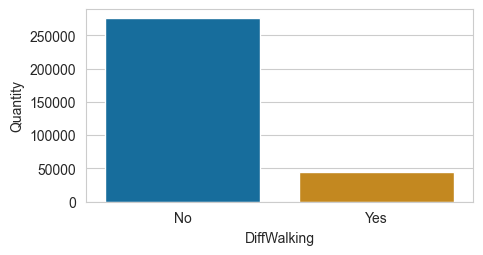

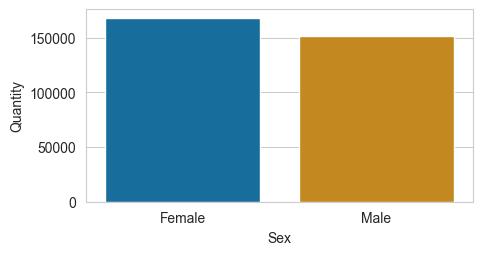

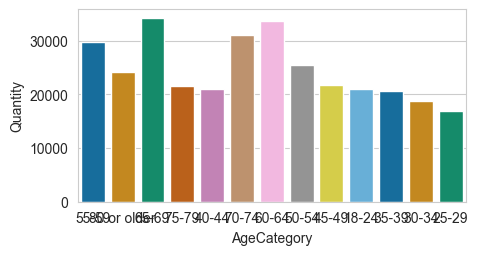

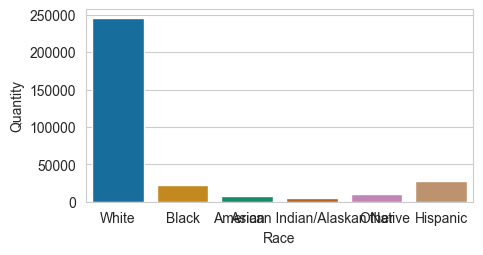

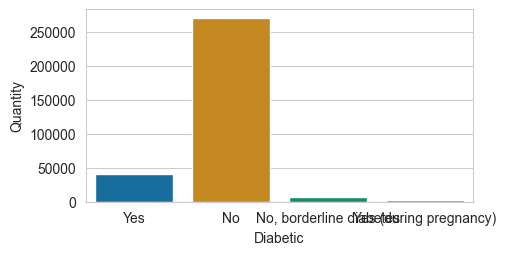

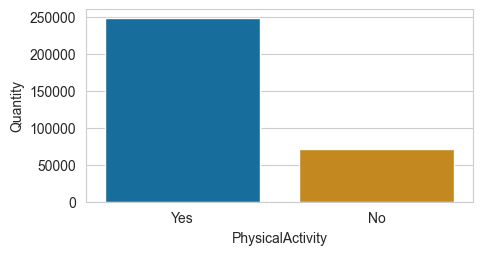

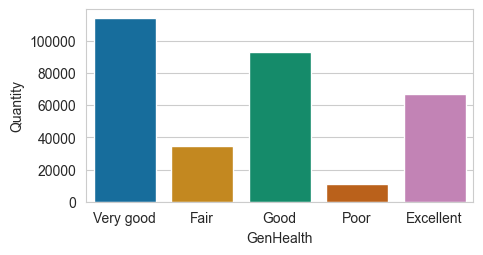

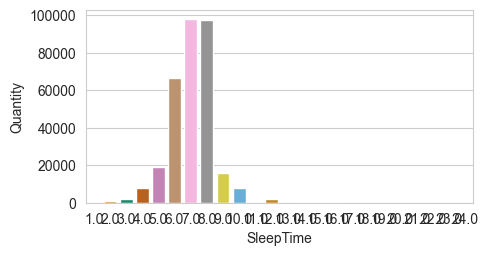

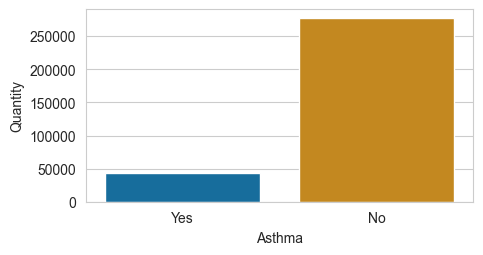

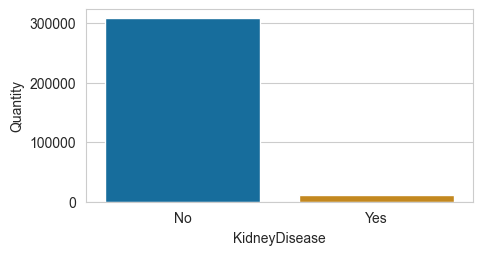

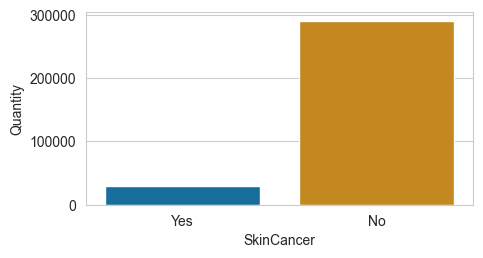

In [11]:
for col in df.columns:
    fig = plt.figure(figsize=(5,2.5), dpi= 100)
    sns.set_style('whitegrid')
    sns.countplot(x=col,data=df,palette='colorblind')
    plt.xlabel(col)
    plt.ylabel("Quantity")

## Гистограмы для числовых значений

### Индекс массы тела

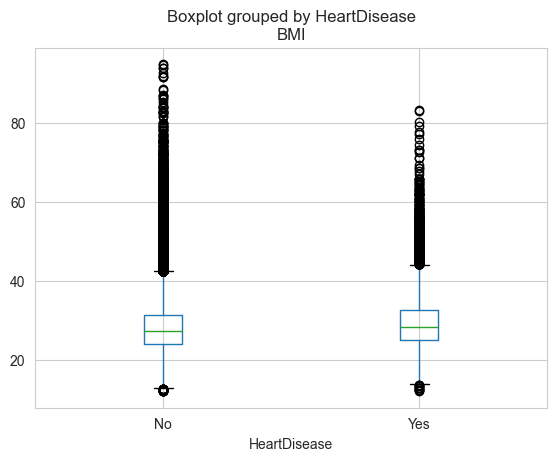

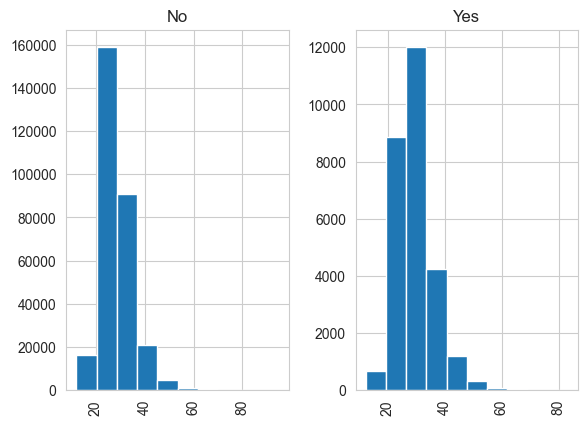

In [12]:
boxplot = df.boxplot(column = 'BMI',by='HeartDisease')
hist = df.hist(column = 'BMI',by = 'HeartDisease')

### Проблемы с физическим здоровьем за последние 30 дней(В днях)

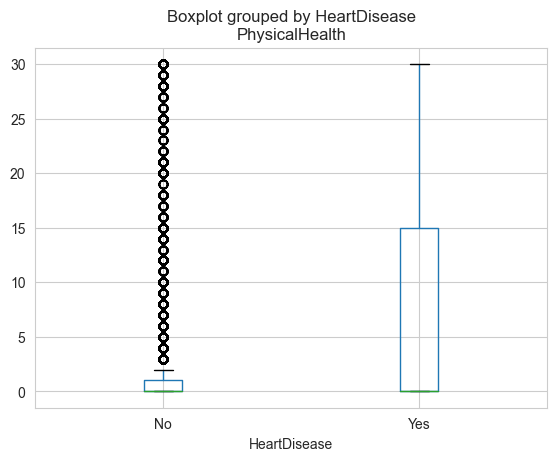

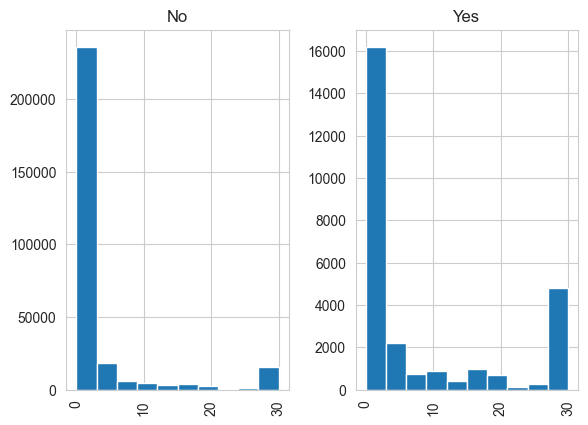

In [13]:
boxplot = df.boxplot(column = 'PhysicalHealth',by='HeartDisease')
hist = df.hist(column = 'PhysicalHealth',by = 'HeartDisease')

### Проблемы с ментальным здоровьем за последние 30 дней(В днях)

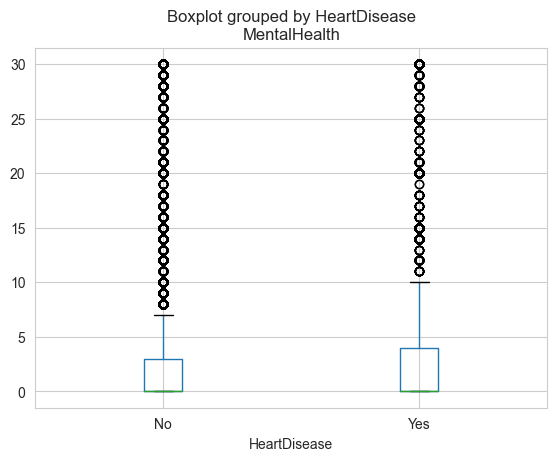

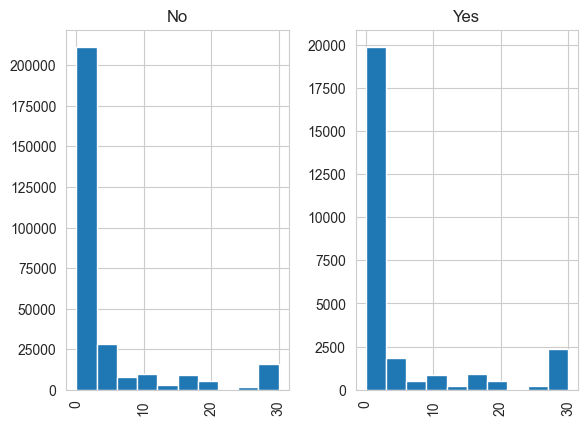

In [14]:
boxplot = df.boxplot(column = 'MentalHealth',by='HeartDisease')
hist = df.hist(column = 'MentalHealth',by = 'HeartDisease')

### Время сна

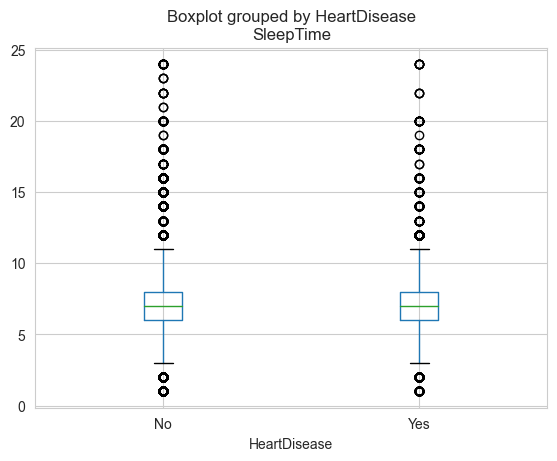

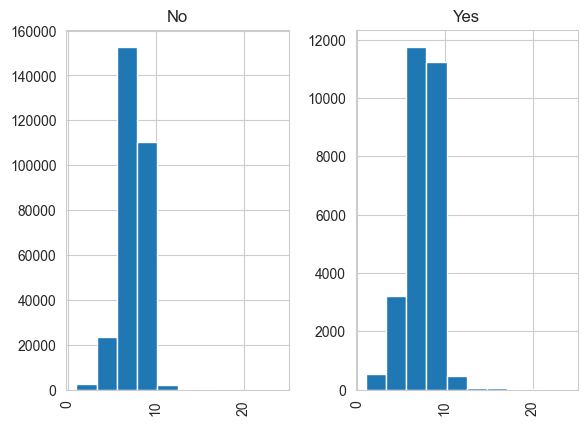

In [15]:
boxplot = df.boxplot(column = 'SleepTime',by='HeartDisease')
hist = df.hist(column = 'SleepTime',by = 'HeartDisease')

## Корреляционная матрица(Общая)

In [16]:
catCols = [col for col in df.columns if df[col].dtype=="O"]


In [17]:
dfn = df
for i in catCols:
    le = LabelEncoder()
    label = le.fit_transform(dfn[i])
    dfn.drop(i, axis=1, inplace=True)
    dfn[i] = label
dfn.head()

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease  Smoking  \
0  16.60             3.0          30.0        5.0             0        1   
1  20.34             0.0           0.0        7.0             0        0   
2  26.58            20.0          30.0        8.0             0        1   
3  24.21             0.0           0.0        6.0             0        0   
4  23.71            28.0           0.0        8.0             0        0   

   AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0                0       0            0    0            7     5         2   
1                0       1            0    0           12     5         0   
2                0       0            0    1            9     5         2   
3                0       0            0    0           11     5         0   
4                0       0            1    0            4     5         0   

   PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  
0                 1          4       1              0           1  
1                 1          4       0              0           0  
2                 1          1       1              0           0  
3                 0          2       0              0           1  
4                 1          4       0              0           0

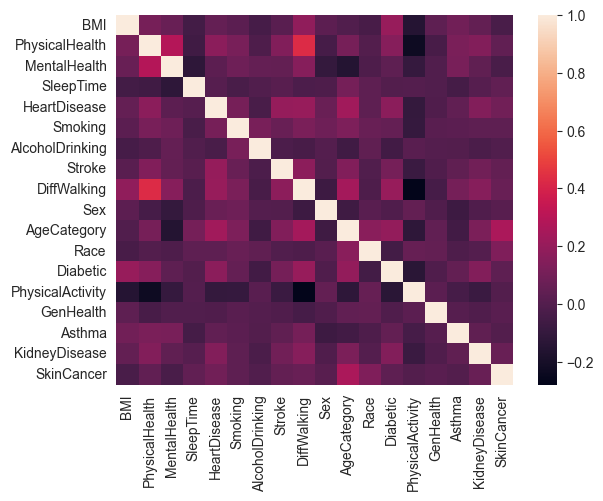

In [18]:
corr = dfn.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='plasma', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

## Корреляционная матрица числовая

In [19]:
df.corr(numeric_only=True)

BMI  PhysicalHealth  MentalHealth  SleepTime  \
BMI               1.000000        0.109788      0.064131  -0.051822   
PhysicalHealth    0.109788        1.000000      0.287987  -0.061387   
MentalHealth      0.064131        0.287987      1.000000  -0.119717   
SleepTime        -0.051822       -0.061387     -0.119717   1.000000   
HeartDisease      0.051803        0.170721      0.028591   0.008327   
Smoking           0.023118        0.115352      0.085157  -0.030336   
AlcoholDrinking  -0.038816       -0.017254      0.051282  -0.005065   
Stroke            0.019733        0.137014      0.046467   0.011900   
DiffWalking       0.181678        0.428373      0.152235  -0.022216   
Sex               0.026940       -0.040904     -0.100058  -0.015704   
AgeCategory      -0.004744        0.110763     -0.155506   0.104953   
Race             -0.037424       -0.000847     -0.014491   0.035889   
Diabetic          0.202472        0.151361      0.032945   0.000449   
PhysicalActivity -0.150616       -0.232283     -0.095808   0.003849   
GenHealth         0.035932       -0.035703     -0.004412  -0.004163   
Asthma            0.092345        0.117907      0.114008  -0.048245   
KidneyDisease     0.050768        0.142197      0.037281   0.006238   
SkinCancer       -0.033644        0.041700     -0.033412   0.041266   

                  HeartDisease   Smoking  AlcoholDrinking    Stroke  \
BMI                   0.051803  0.023118        -0.038816  0.019733   
PhysicalHealth        0.170721  0.115352        -0.017254  0.137014   
MentalHealth          0.028591  0.085157         0.051282  0.046467   
SleepTime             0.008327 -0.030336        -0.005065  0.011900   
HeartDisease          1.000000  0.107764        -0.032080  0.196835   
Smoking               0.107764  1.000000         0.111768  0.061226   
AlcoholDrinking      -0.032080  0.111768         1.000000 -0.019858   
Stroke                0.196835  0.061226        -0.019858  1.000000   
DiffWalking           0.201258  0.120074        -0.035328  0.174143   
Sex                   0.070040  0.085052         0.004200 -0.003091   
AgeCategory           0.233432  0.128331        -0.059528  0.137822   
Race                  0.034854  0.065499         0.036702 -0.003956   
Diabetic              0.168553  0.053847        -0.057372  0.101518   
PhysicalActivity     -0.100030 -0.097174         0.017487 -0.079455   
GenHealth            -0.011062  0.020625         0.001629 -0.009335   
Asthma                0.041444  0.024149        -0.002202  0.038866   
KidneyDisease         0.145197  0.034920        -0.028280  0.091167   
SkinCancer            0.093317  0.033977        -0.005702  0.048116   

                  DiffWalking       Sex  AgeCategory      Race  Diabetic  \
BMI                  0.181678  0.026940    -0.004744 -0.037424  0.202472   
PhysicalHealth       0.428373 -0.040904     0.110763 -0.000847  0.151361   
MentalHealth         0.152235 -0.100058    -0.155506 -0.014491  0.032945   
SleepTime           -0.022216 -0.015704     0.104953  0.035889  0.000449   
HeartDisease         0.201258  0.070040     0.233432  0.034854  0.168553   
Smoking              0.120074  0.085052     0.128331  0.065499  0.053847   
AlcoholDrinking     -0.035328  0.004200    -0.059528  0.036702 -0.057372   
Stroke               0.174143 -0.003091     0.137822 -0.003956  0.101518   
DiffWalking          1.000000 -0.068860     0.243263 -0.015831  0.205502   
Sex                 -0.068860  1.000000    -0.067478  0.018855 -0.013456   
AgeCategory          0.243263 -0.067478     1.000000  0.163090  0.193745   
Race                -0.015831  0.018855     0.163090  1.000000 -0.052216   
Diabetic             0.205502 -0.013456     0.193745 -0.052216  1.000000   
PhysicalActivity    -0.278524  0.048247    -0.121687  0.056767 -0.133824   
GenHealth           -0.043552 -0.010283     0.044427  0.050344 -0.010854   
Asthma               0.103222 -0.069191    -0.058108 -0.017975  0.049827   
KidneyDisease        0.153064 -

## Correlation Funnel

In [20]:
#list(corr_funnel):
#    for j in list(corr_funnel[i]):
df = pd.read_csv('heart_2020_cleaned.csv')

In [21]:
v_0 = len(df)
l0 = len(df[df['HeartDisease'] == 'No'])
l1 = len(df[df['HeartDisease'] == 'Yes'])
freq0 = l0/v_0 
freq1 = l1/v_0
corr_funnel = {}
impact_mean = []
impact_max = []
for i in catCols:
    unqval = df[i].unique()
    #print(i)
    num_corr = {}
    importance = []
    for j in unqval:
        dft1 = df[(df[i] == j) & (df['HeartDisease'] == 'No')]
        dft2 = df[(df[i] == j) & (df['HeartDisease'] == 'Yes')]
        v1 = len(dft1)/freq0
        v2 = len(dft2)/freq1
        v0 = v1+v2
        if v1 > v2:
            #print(j, -(v1/v0-0.5)*2)
            num_corr[j] = (-(v1/v0-0.5)*2)
            importance.append((-(v1/v0-0.5)*2))
        else:
            #print(j, (v2/v0-0.5)*2)
            num_corr[j] = ((v2/v0-0.5)*2)
            importance.append(((v2/v0-0.5)*2))
        del dft1
        del dft2
    num_corr['mean'] = statistics.mean([abs(ele) for ele in importance])
    num_corr['max'] = max(importance)
    impact_mean.append(statistics.mean([abs(ele) for ele in importance]))
    impact_max.append(max(importance))
    corr_funnel[i] = num_corr
impact_mean.sort()
impact_max.sort()



Asthma
Sex
AlcoholDrinking
Race
PhysicalActivity
Smoking
SkinCancer
Diabetic
DiffWalking
KidneyDisease
Stroke
GenHealth
AgeCategory
HeartDisease


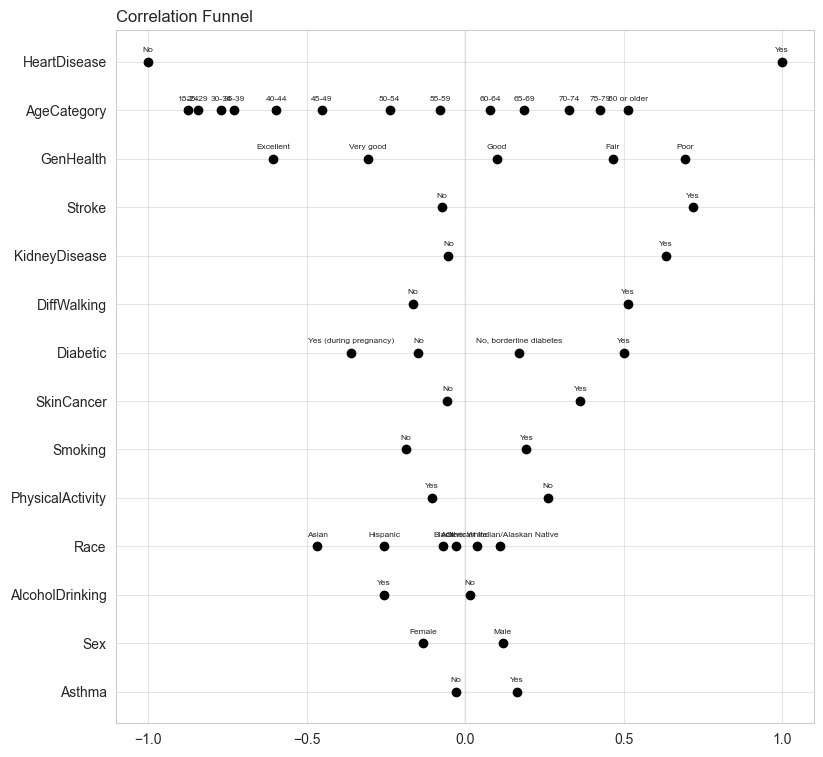

In [22]:
key1 = list(corr_funnel)
f, ax = plt.subplots()
q = 0
for i in impact_mean:
    
    for key in key1:
        if corr_funnel[key]['mean'] == i:
            break
    list1 = list(corr_funnel[key].items())
    list1.pop(-1)
    list1.pop(-1) 
    print(key)
    
    for j in list1:
        ax.scatter(j[1],key, marker='o', color='black', linewidths = 1)
        plt.text(j[1], q+0.2,j[0], size =6, horizontalalignment = 'center' )
    q = q+1
plt.grid(which = 'major',alpha=0.5)
#plt.xticks(rotation = 90)
ax.axvline(x=0, color=(171/255, 52/255, 58/255), linestyle='dashed', linewidth=0.1)
f.set_figwidth(9)
f.set_figheight(9)
major_tick = [-1, -0.5, 0, 0.5, 1]
plt.title('Correlation Funnel', loc = 'left')
ax.set_xticks(major_tick) # Grid


AlcoholDrinking
Race
Sex
Asthma
Smoking
PhysicalActivity
SkinCancer
Diabetic
AgeCategory
DiffWalking
KidneyDisease
GenHealth
Stroke
HeartDisease


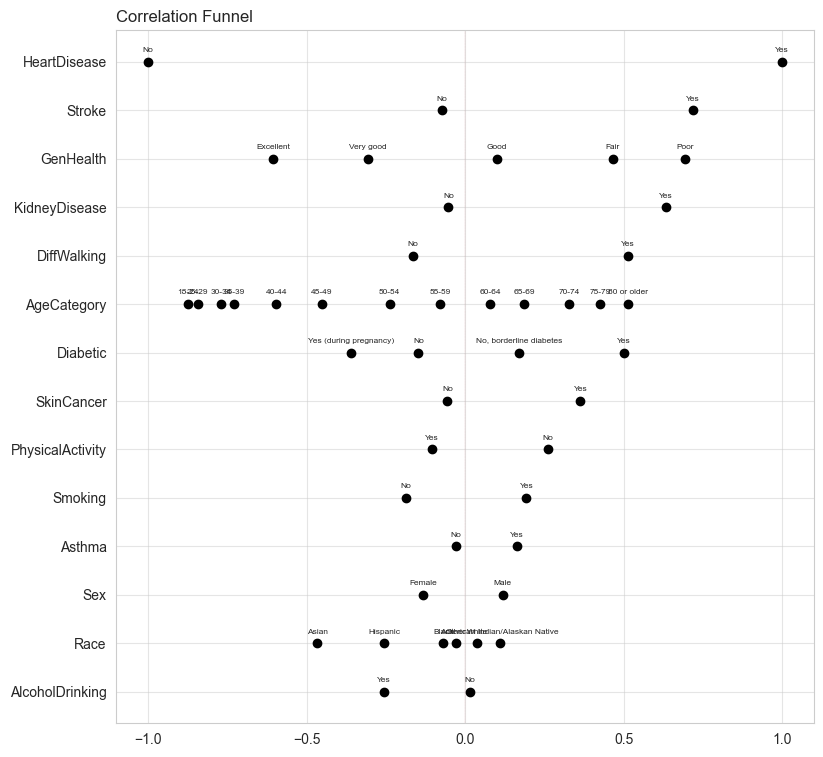

In [23]:
key1 = list(corr_funnel)
f, ax = plt.subplots()
q = 0
for i in impact_max:
    
    for key in key1:
        if corr_funnel[key]['max'] == i:
            break
    list1 = list(corr_funnel[key].items())
    list1.pop(-1)
    list1.pop(-1) 
    print(key)
    
    for j in list1:
        ax.scatter(j[1],key, marker='o', color='black', linewidths = 1)
        plt.text(j[1], q+0.2,j[0], size =6, horizontalalignment = 'center' )
    q = q+1
plt.grid(which = 'major',alpha=0.5)
#plt.xticks(rotation = 90)
ax.axvline(x=0, color=(171/255, 52/255, 58/255), linestyle='dashed', linewidth=0.1)
f.set_figwidth(9)
f.set_figheight(9)
major_tick = [-1, -0.5, 0, 0.5, 1]
plt.title('Correlation Funnel', loc = 'left')
ax.set_xticks(major_tick) # Grid

## Визуализация данных

### Влияние категориального признака на заболевания сердца

[0.0, 100.0]
[6.03341370078824, 12.157715983867543]
[8.802152890093886, 5.239472838315654]
[7.468982146454964, 36.36589609743972]
[6.298454890426131, 22.580499887412746]
[6.6946753672417385, 10.618461740904008]
[0.6171667299658185, 0.784429371866706, 1.205140510851597, 1.440389294403893, 2.313624678663239, 3.414253590932036, 5.448743203845244, 7.3999395100312535, 9.876506560588968, 12.008433135193698, 15.602768388862062, 18.848338143562053, 22.56034447066617]
[10.419069588619761, 3.2969757064947944, 7.537381751602075, 5.257596735407709, 8.107613469985358, 9.178588323573072]
[6.4968681972757585, 11.63545199823035, 21.952355276702125, 4.220398593200469]
[13.758734931373368, 7.053239069677404]
[2.24409802220161, 20.4285261124088, 10.263183326353767, 34.103995039418905, 4.726062288113264]
[8.103335584259884, 11.506344467251353]
[7.7651810295569055, 29.331861787927664]
[7.722363230060419, 16.700761259599584]


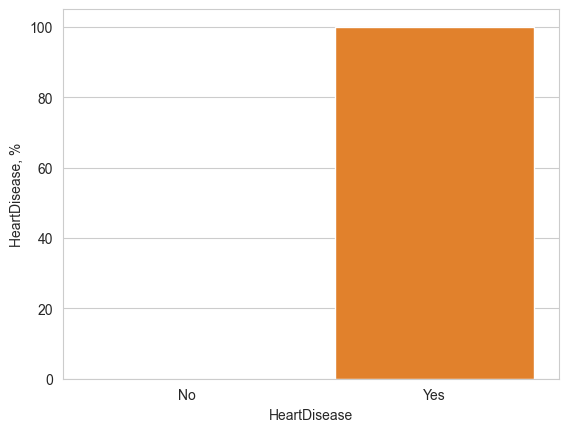

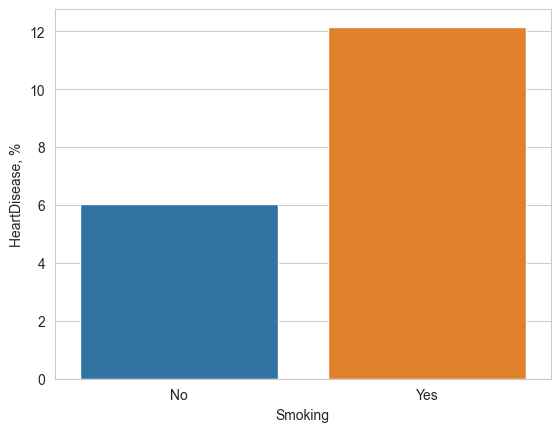

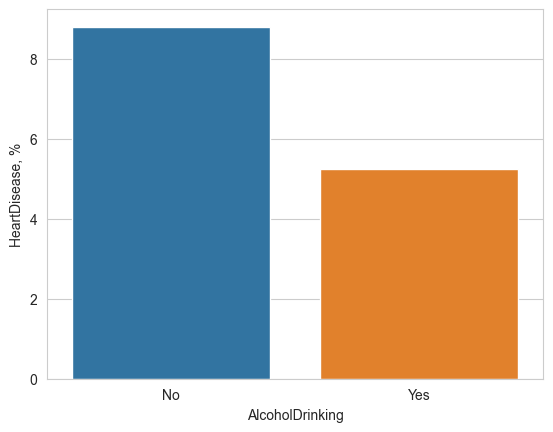

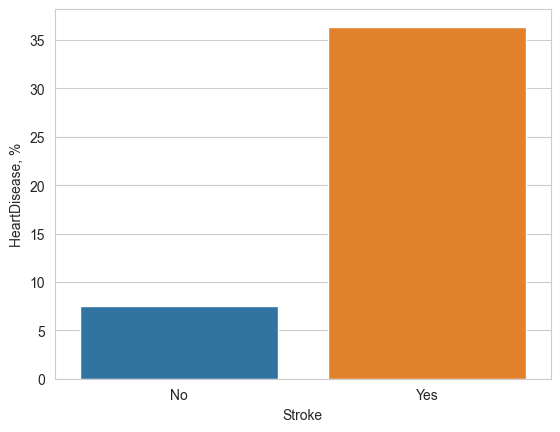

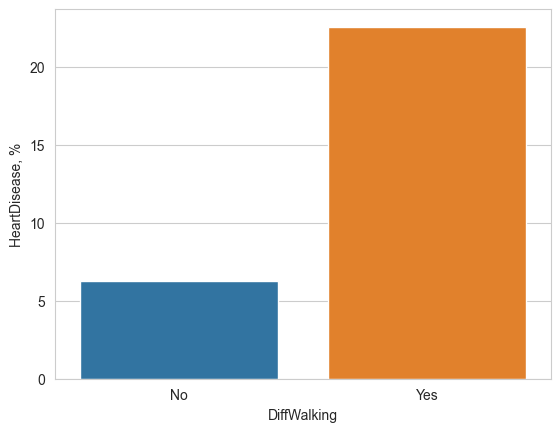

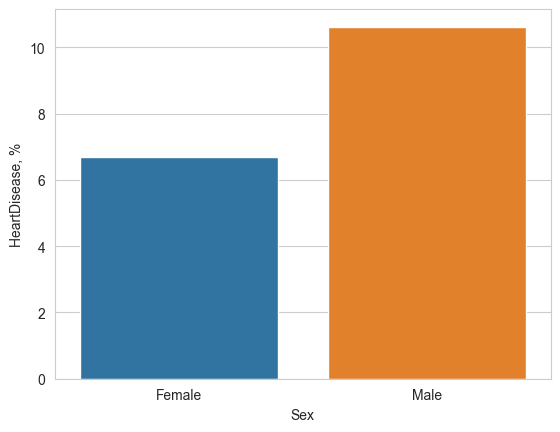

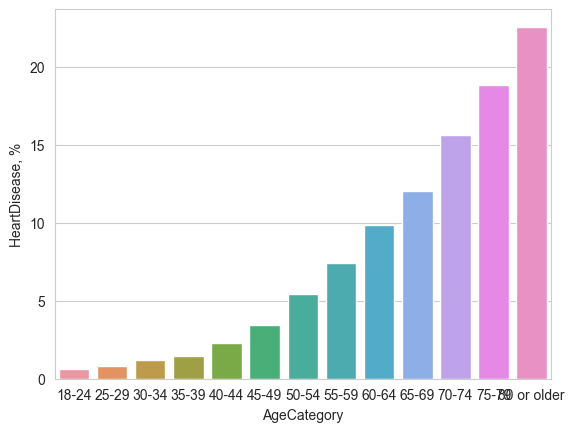

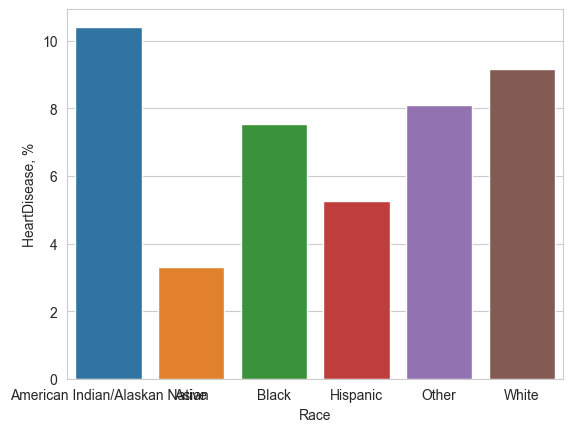

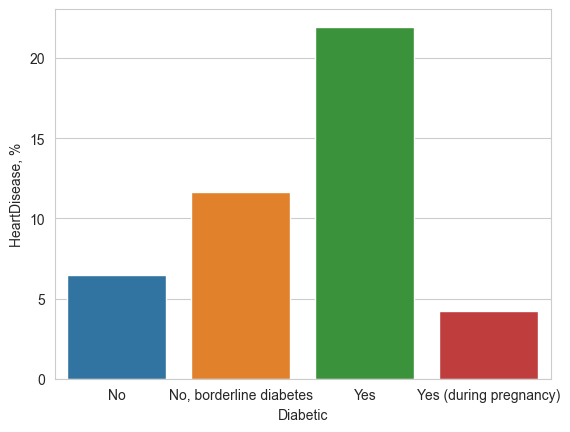

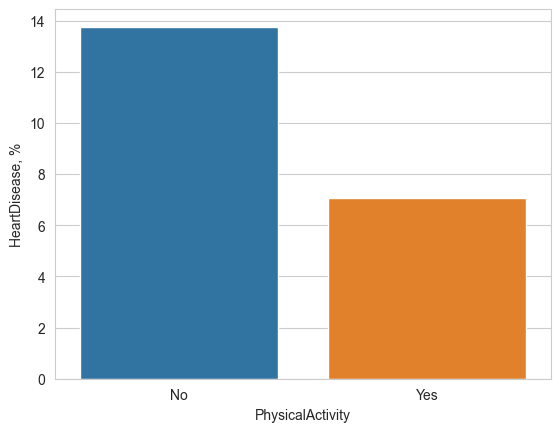

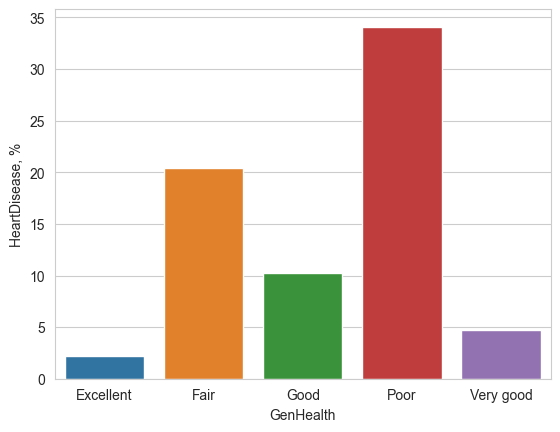

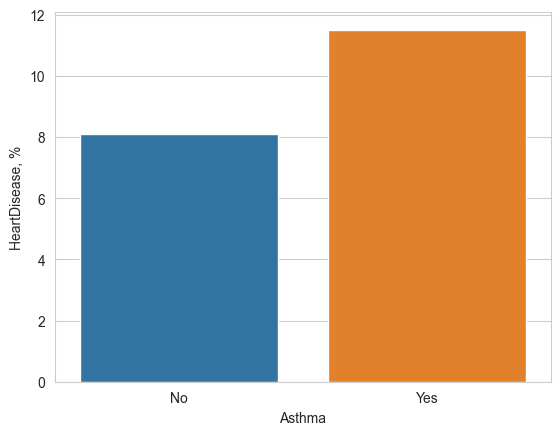

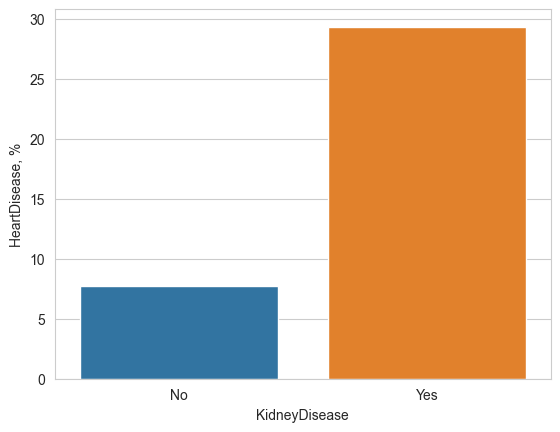

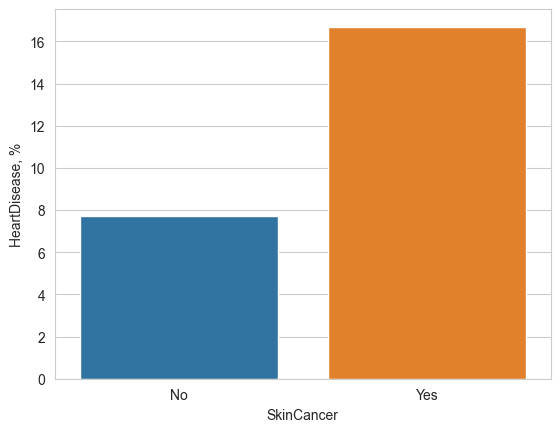

In [55]:
for col in catCols:
    a = df[col].unique()
    a.sort()
    alco_drunk = []
    for i in a:
        df1 = df[df[col]==i]
        l1 = len(df1)
        l0 = len(df1[df1['HeartDisease'] == 'Yes'])
        alco_drunk.append(l0/l1*100)
    plt.figure()
    p = sns.barplot(x=a, y = alco_drunk)
    p.set(xlabel=col, ylabel='HeartDisease, %')
    print(alco_drunk)

### ColorMap

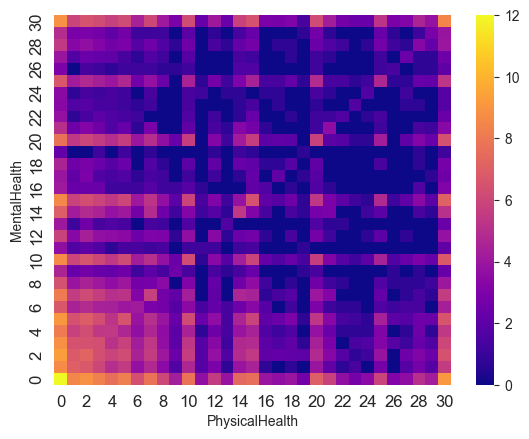

In [25]:
list0 = [df['MentalHealth'].to_list(), df['PhysicalHealth'].to_list()]
list1 = [list(i) for i in zip(*list0)]
qointer = np.ones([31,31])
qointer = qointer.astype(int)
for i in list1:
    qointer[int(i[0]),int(i[1])] = qointer[int(i[0]),int(i[1])] + 1
sns.heatmap(np.log(qointer), cmap="plasma")
plt.gca().set(xlabel='PhysicalHealth', ylabel='MentalHealth')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

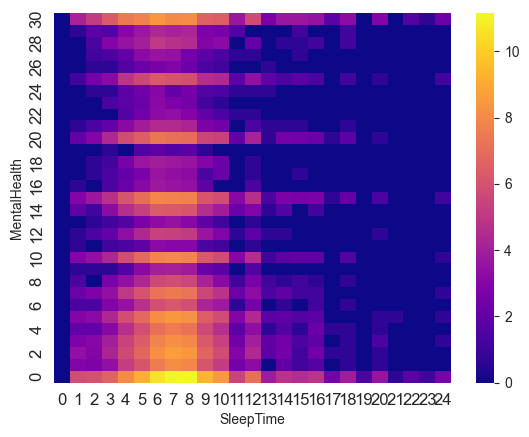

In [26]:
list0 = [df['MentalHealth'].to_list(), df['SleepTime'].to_list()]
list1 = [list(i) for i in zip(*list0)]
qointer = np.ones([31,25])
qointer = qointer.astype(int)
for i in list1:
    qointer[int(i[0]),int(i[1])] = qointer[int(i[0]),int(i[1])] + 1
sns.heatmap(np.log(qointer), cmap="plasma")
plt.gca().set(xlabel='SleepTime', ylabel='MentalHealth')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

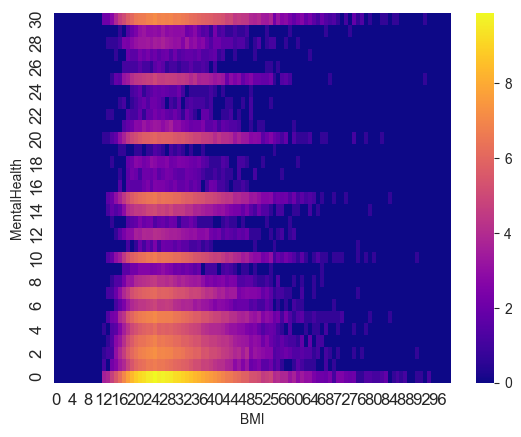

In [27]:
list0 = [df['MentalHealth'].to_list(), df['BMI'].to_list()]
list1 = [list(i) for i in zip(*list0)]
qointer = np.ones([31,100])
qointer = qointer.astype(int)
for i in list1:
    qointer[int(i[0]),int(i[1])] = qointer[int(i[0]),int(i[1])] + 1
sns.heatmap(np.log(qointer), cmap="plasma")
plt.gca().set(xlabel='BMI', ylabel='MentalHealth')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

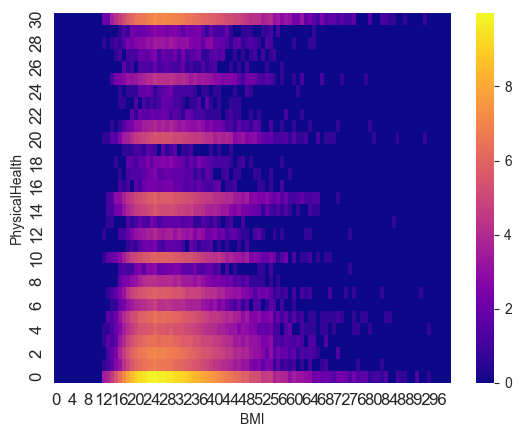

In [28]:
list0 = [df['PhysicalHealth'].to_list(), df['BMI'].to_list()]
list1 = [list(i) for i in zip(*list0)]
qointer = np.ones([31,100])
qointer = qointer.astype(int)
for i in list1:
    qointer[int(i[0]),int(i[1])] = qointer[int(i[0]),int(i[1])] + 1
sns.heatmap(np.log(qointer), cmap="plasma")
plt.gca().set(xlabel='BMI', ylabel='PhysicalHealth')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

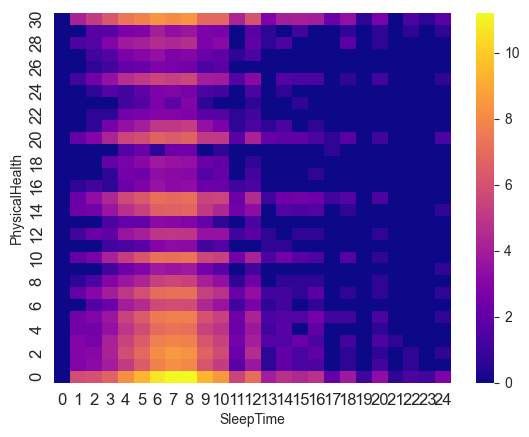

In [29]:
list0 = [df['PhysicalHealth'].to_list(), df['SleepTime'].to_list()]
list1 = [list(i) for i in zip(*list0)]
qointer = np.ones([31,25])
qointer = qointer.astype(int)
for i in list1:
    qointer[int(i[0]),int(i[1])] = qointer[int(i[0]),int(i[1])] + 1
sns.heatmap(np.log(qointer), cmap="plasma")
plt.gca().set(xlabel='SleepTime', ylabel='PhysicalHealth')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

### Возрастные гистограммы

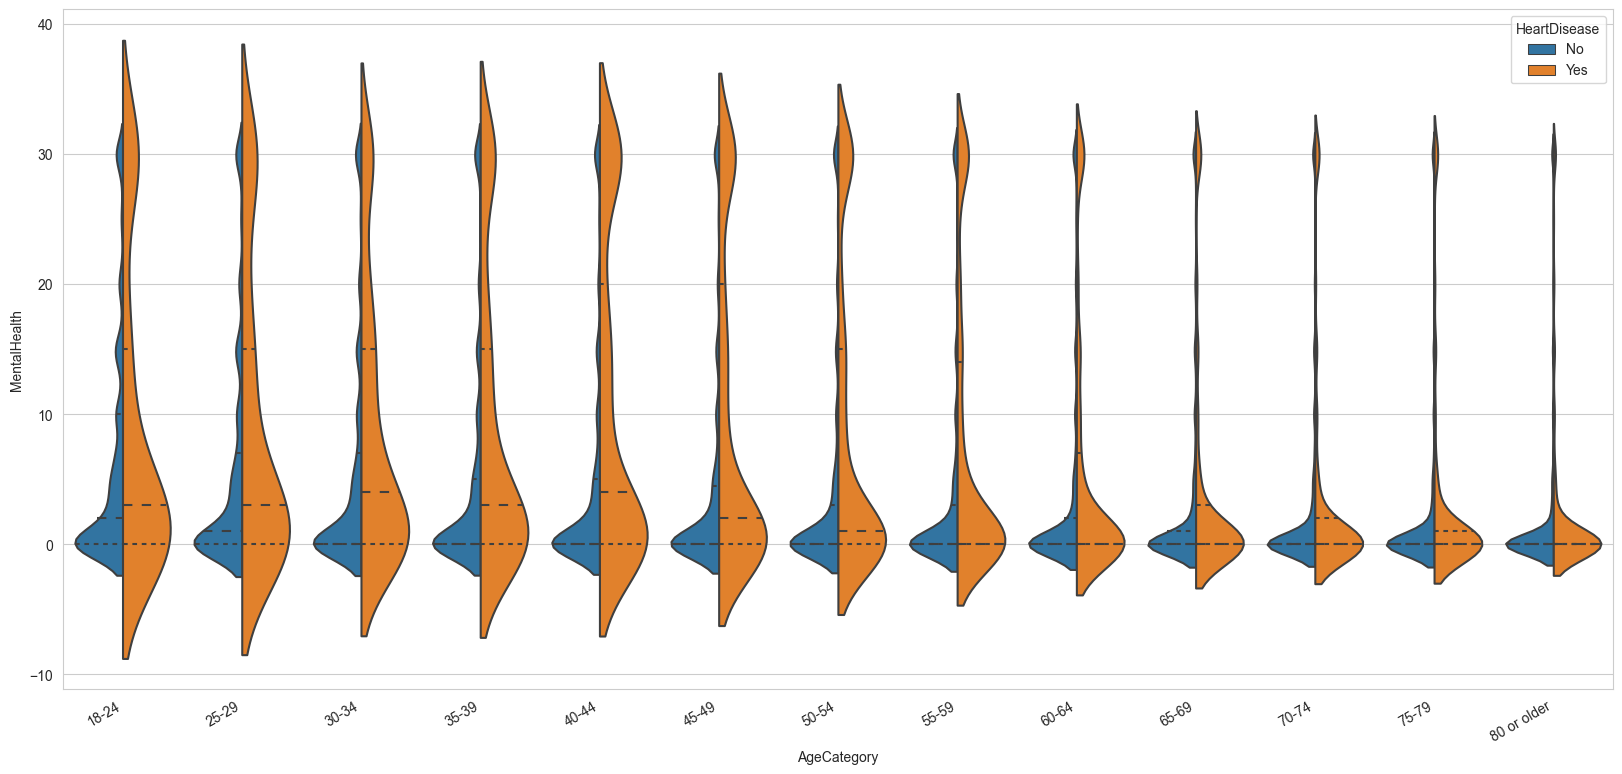

In [30]:
a = df['AgeCategory'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='AgeCategory', y='MentalHealth',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()
#plt.xticks(rotation=90)

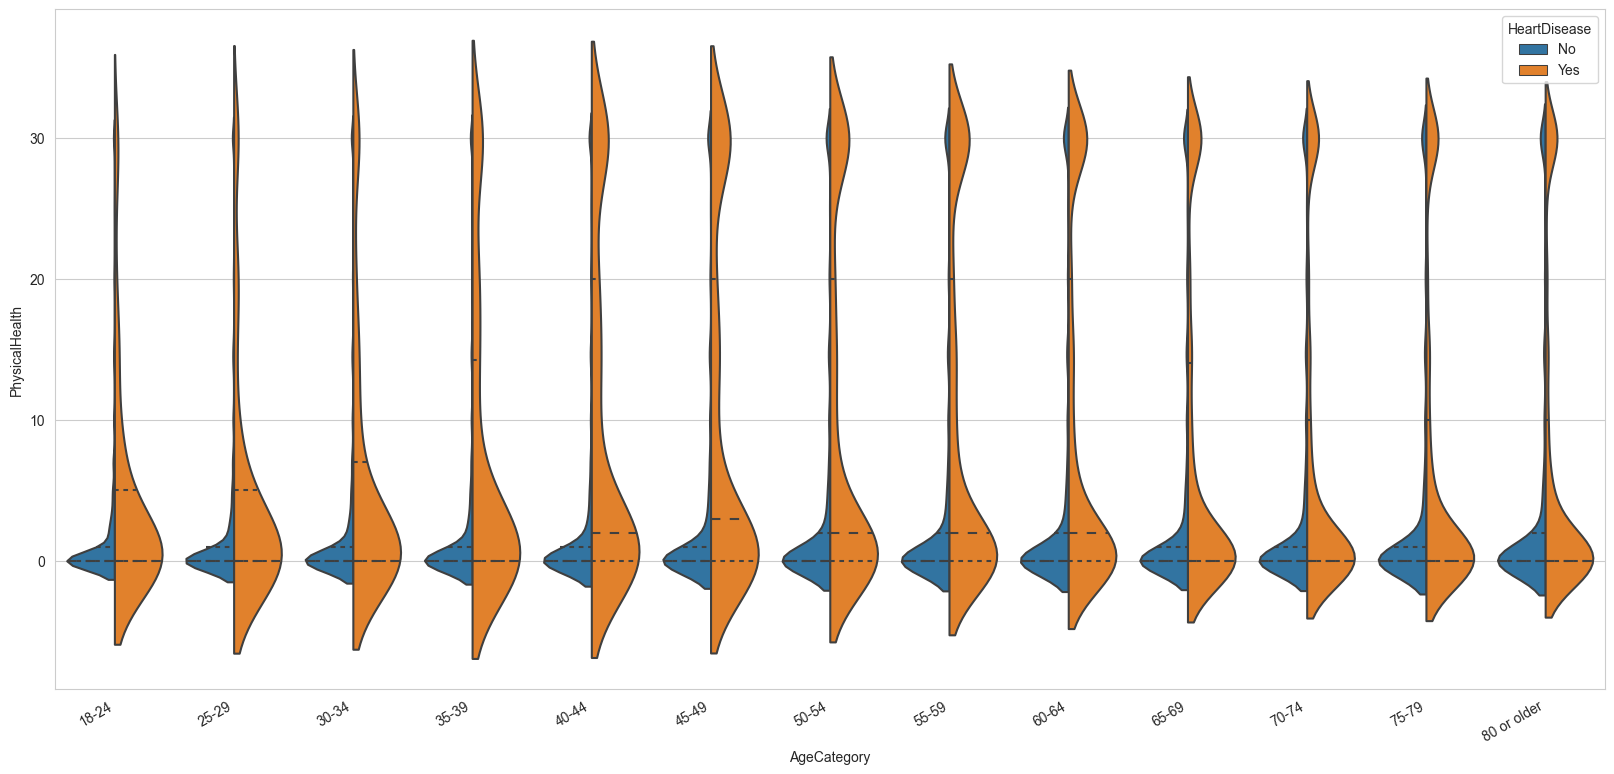

In [31]:
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='AgeCategory', y='PhysicalHealth',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

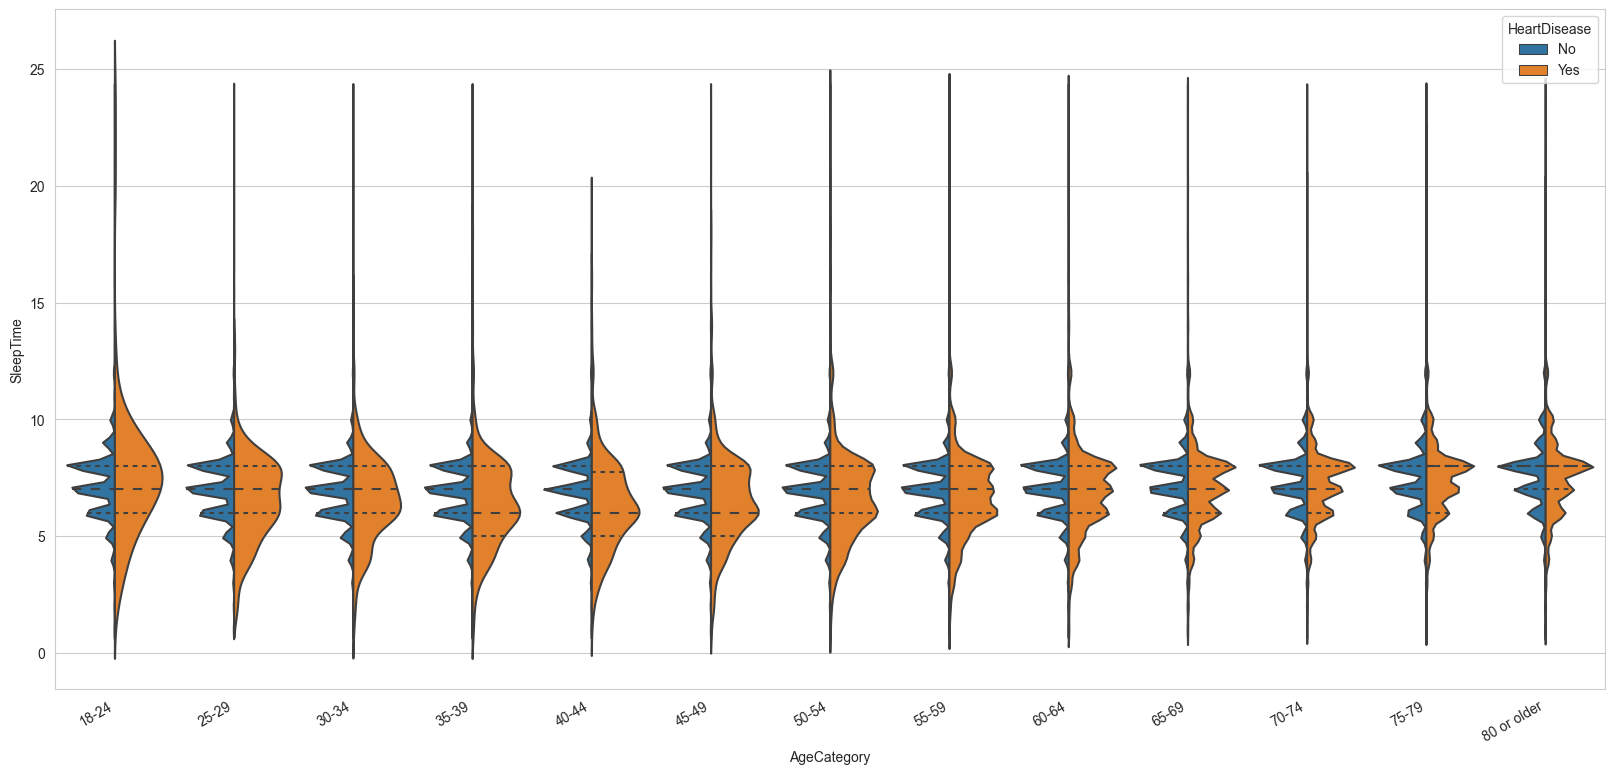

In [32]:
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='AgeCategory', y='SleepTime',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

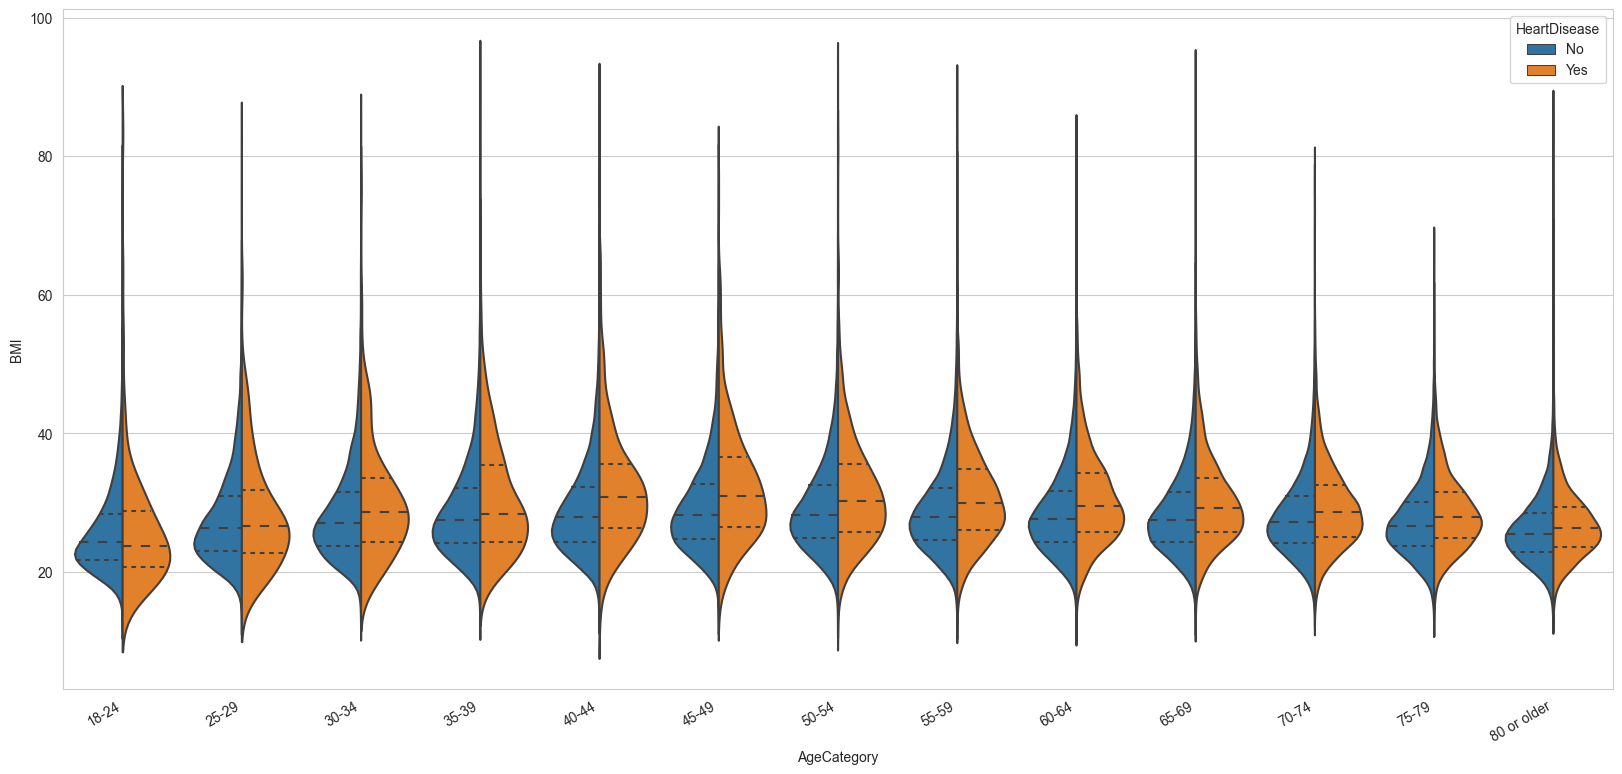

In [33]:
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='AgeCategory', y='BMI',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

### Общее здоровье 

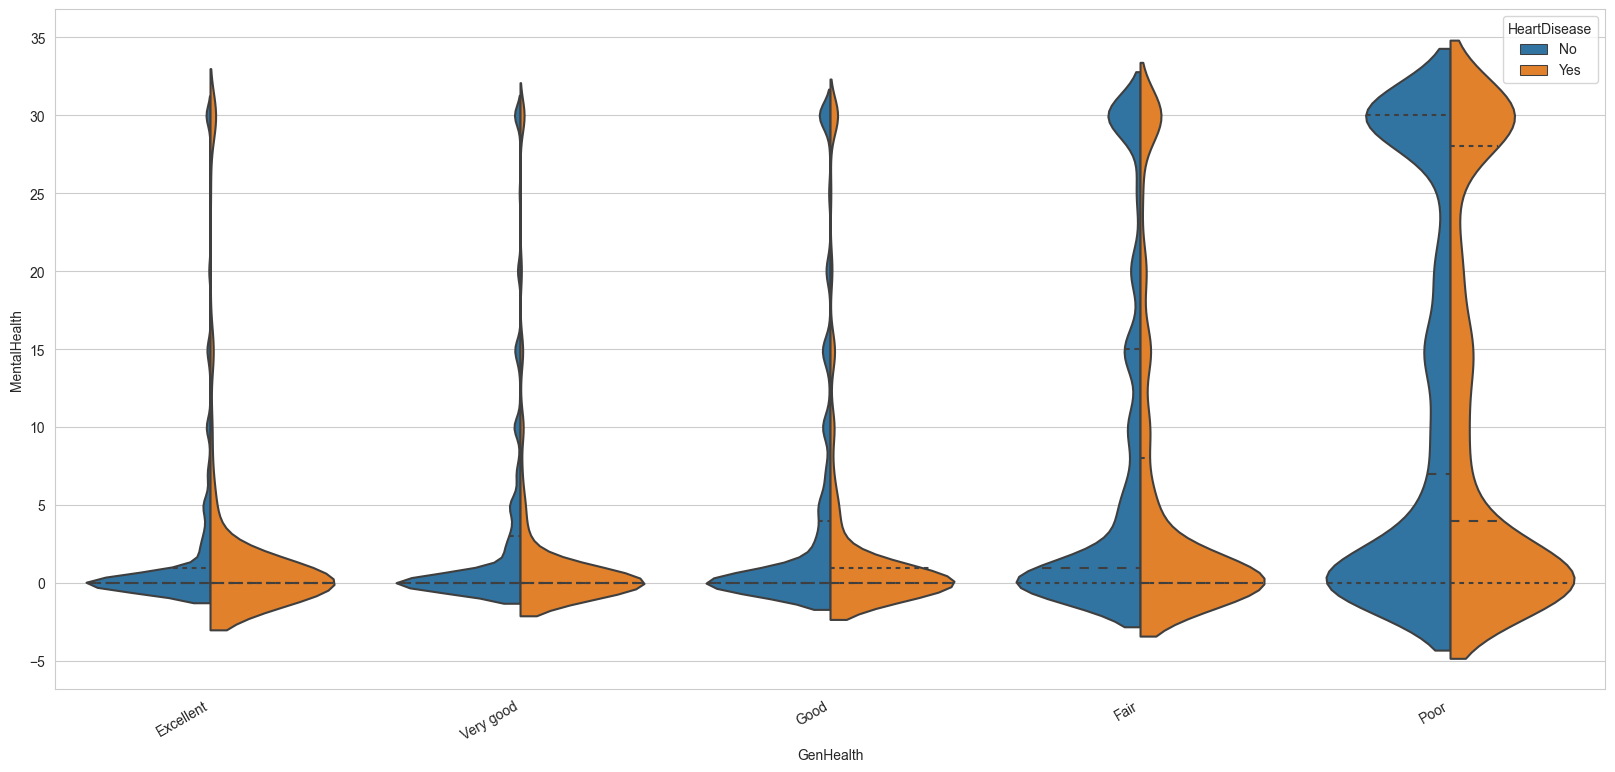

In [34]:
a = df['GenHealth'].unique()
a = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='GenHealth', y='MentalHealth',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = a)
fig.autofmt_xdate()

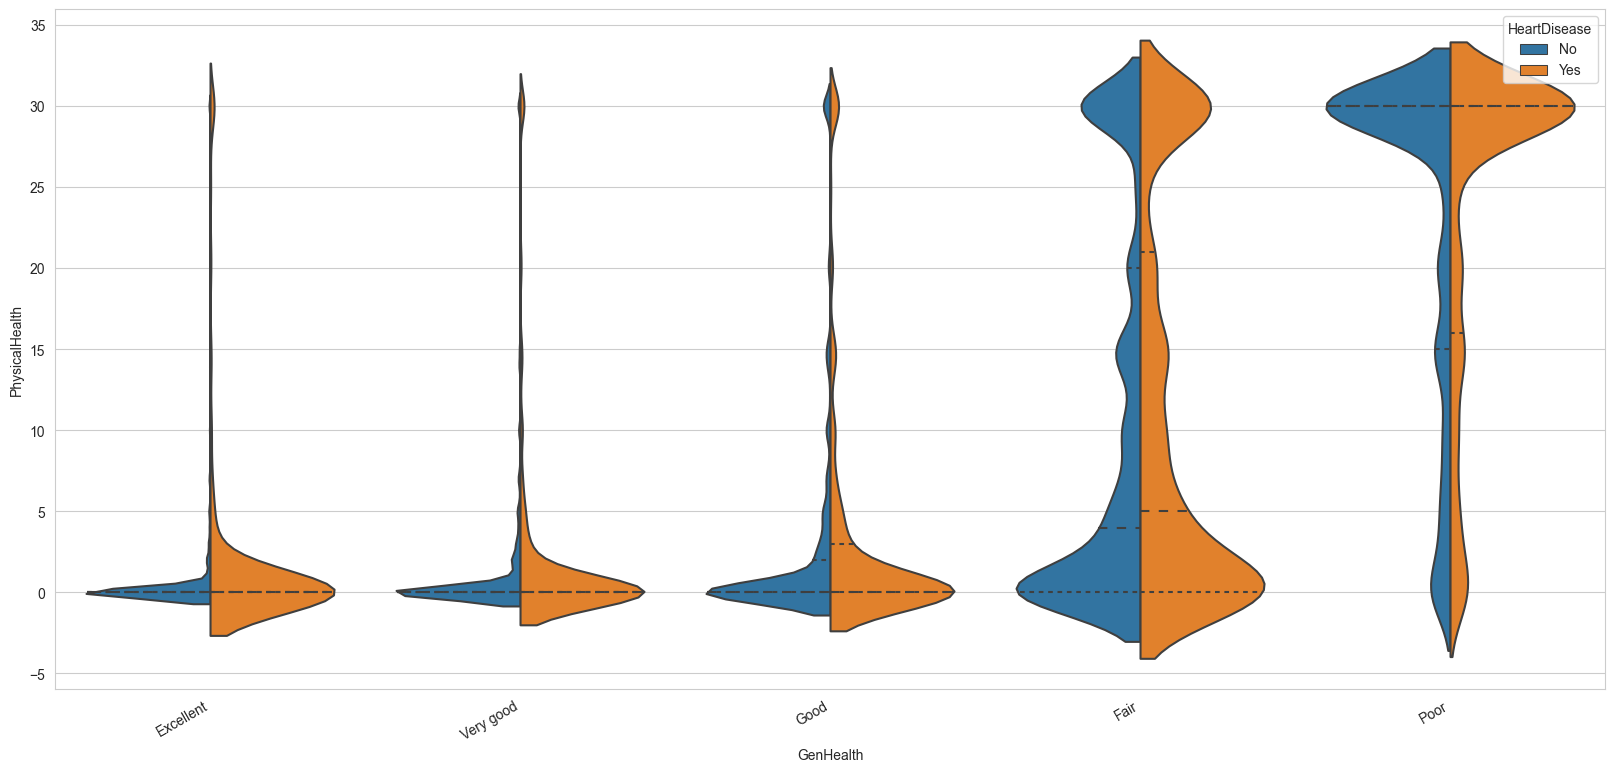

In [35]:
a = df['GenHealth'].unique()
a = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='GenHealth', y='PhysicalHealth',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = a)
fig.autofmt_xdate()

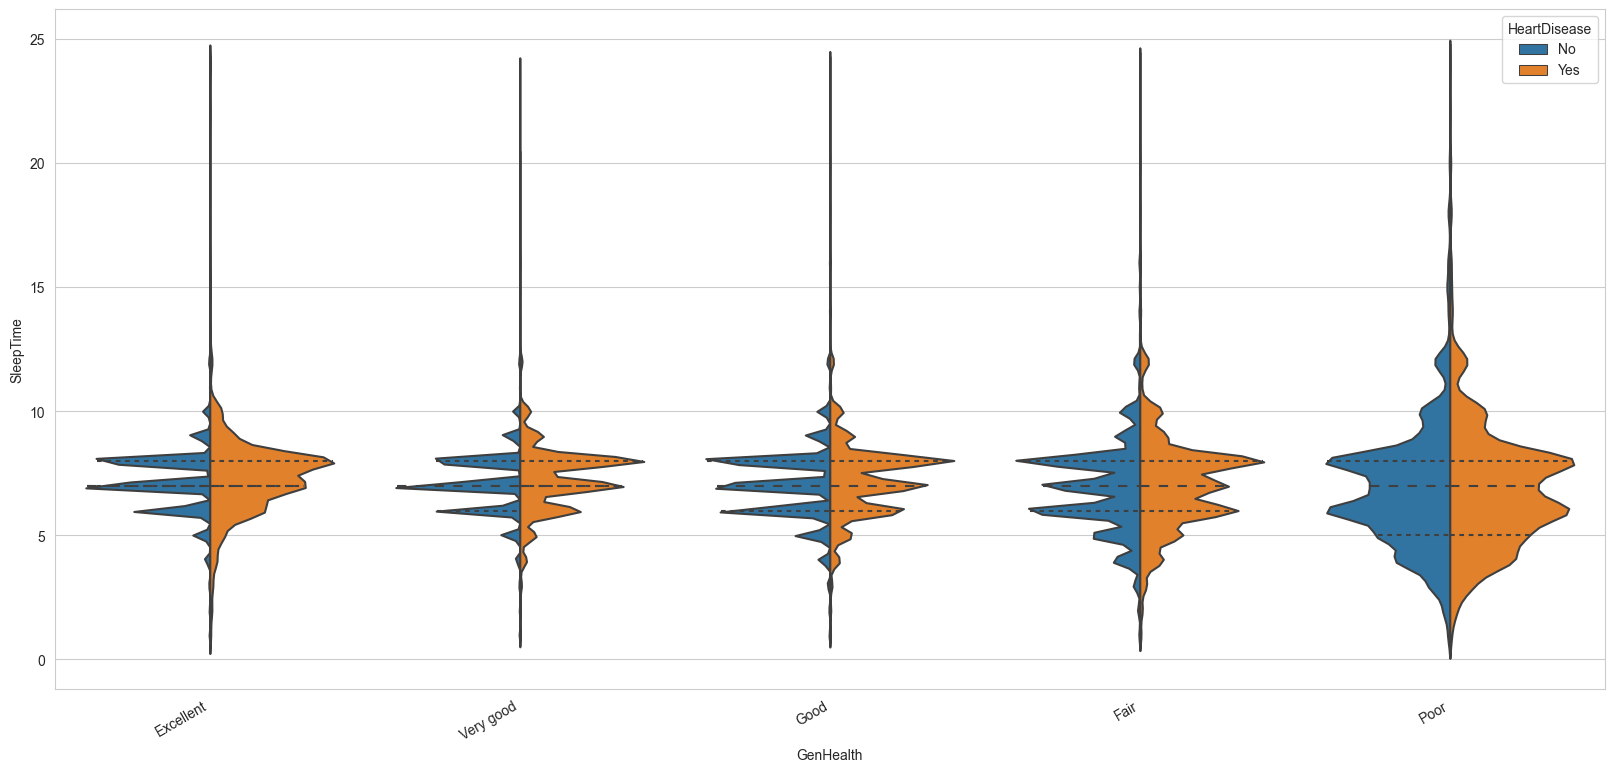

In [36]:
a = df['GenHealth'].unique()
a = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='GenHealth', y='SleepTime', data=df,hue="HeartDisease", split=True, scale='width', inner='quartile', order = a)
fig.autofmt_xdate()

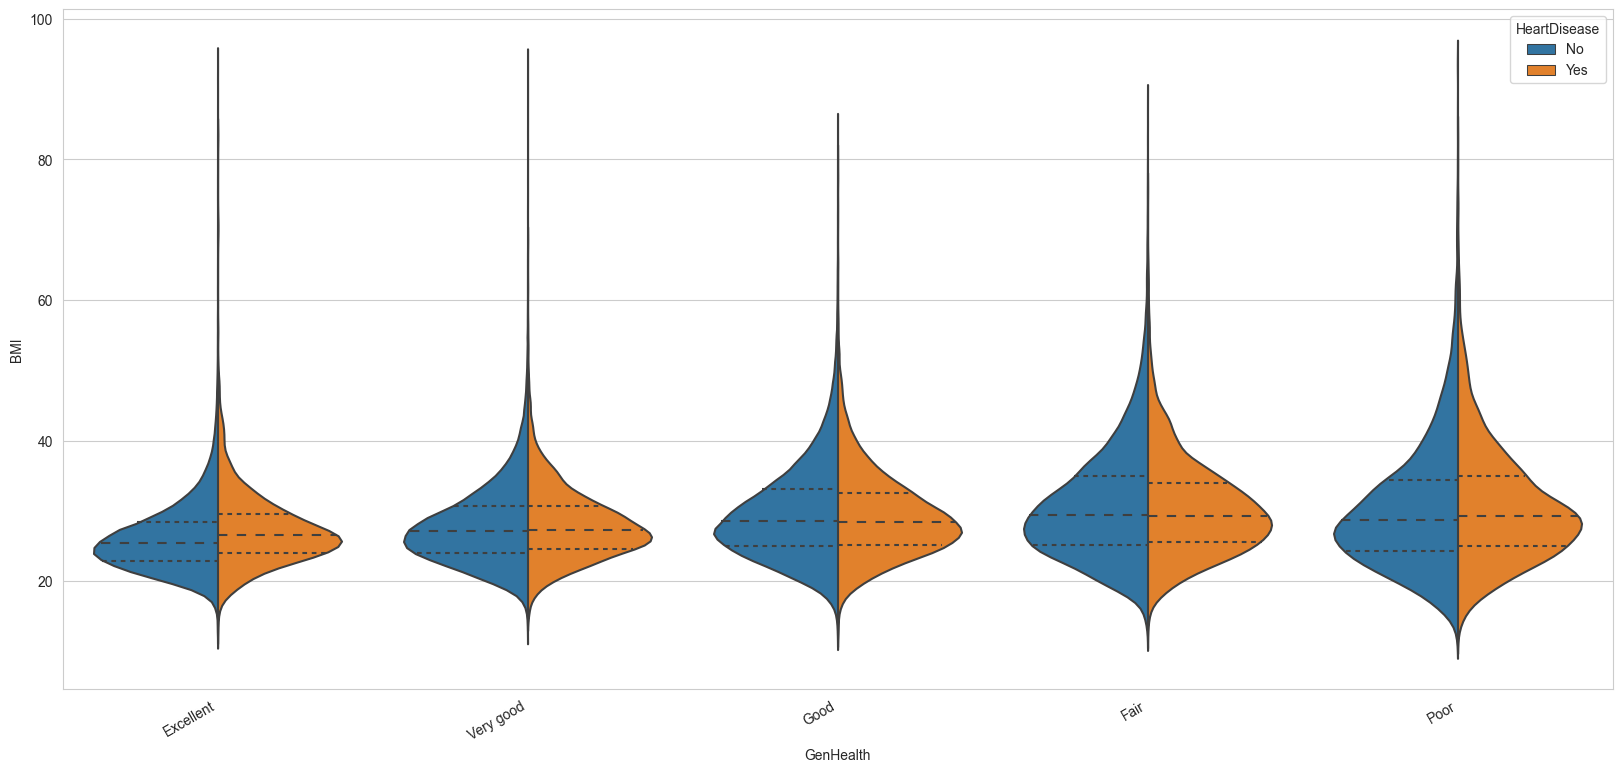

In [37]:
a = df['GenHealth'].unique()
a = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='GenHealth', y='BMI',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = a)
fig.autofmt_xdate()

### Race

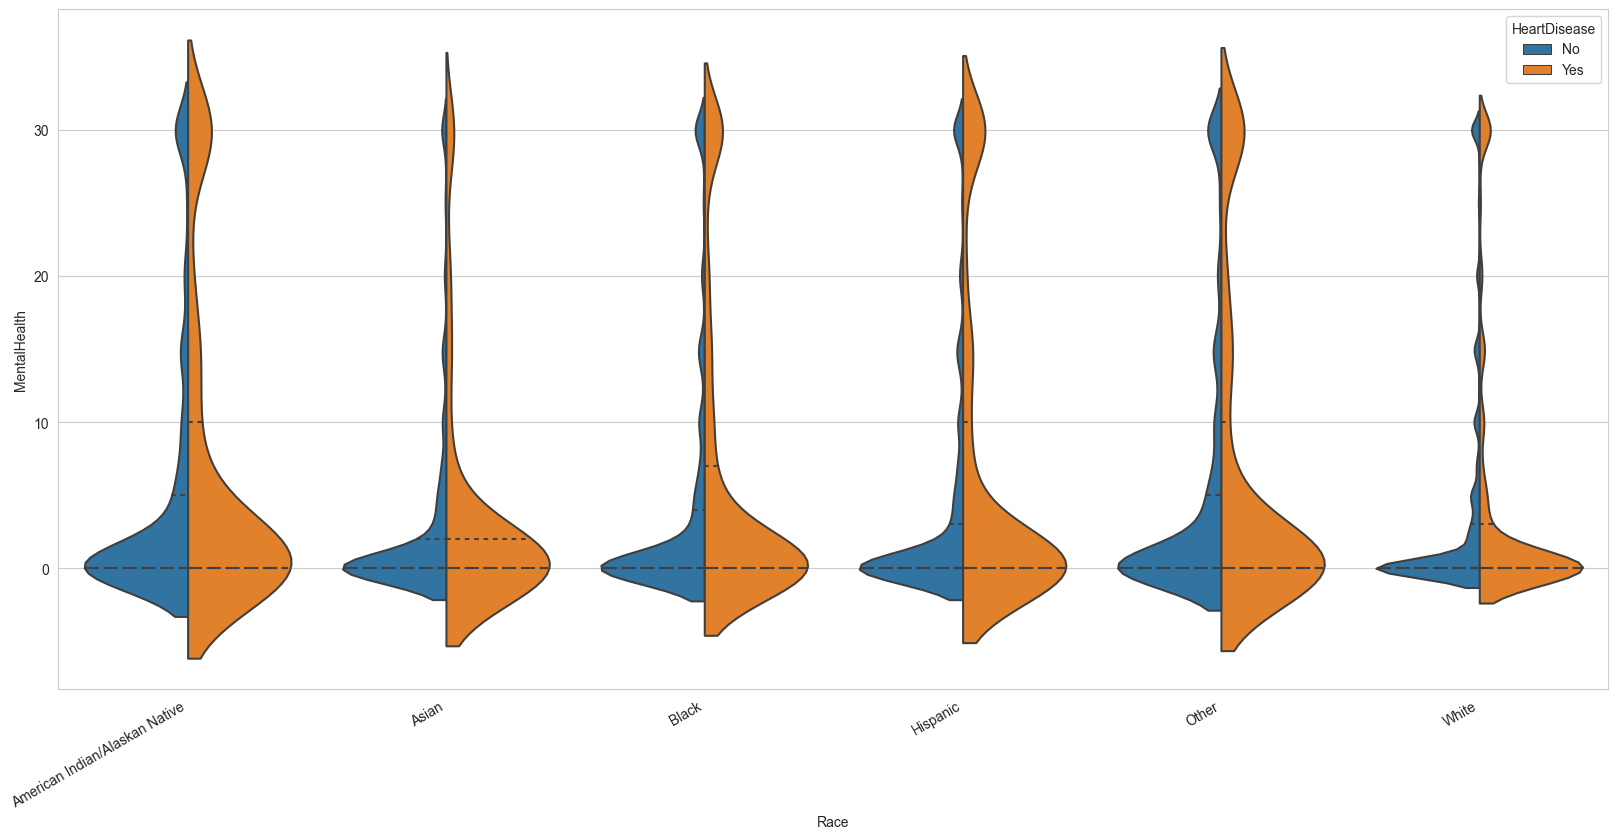

In [38]:
a = df['Race'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Race', y='MentalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

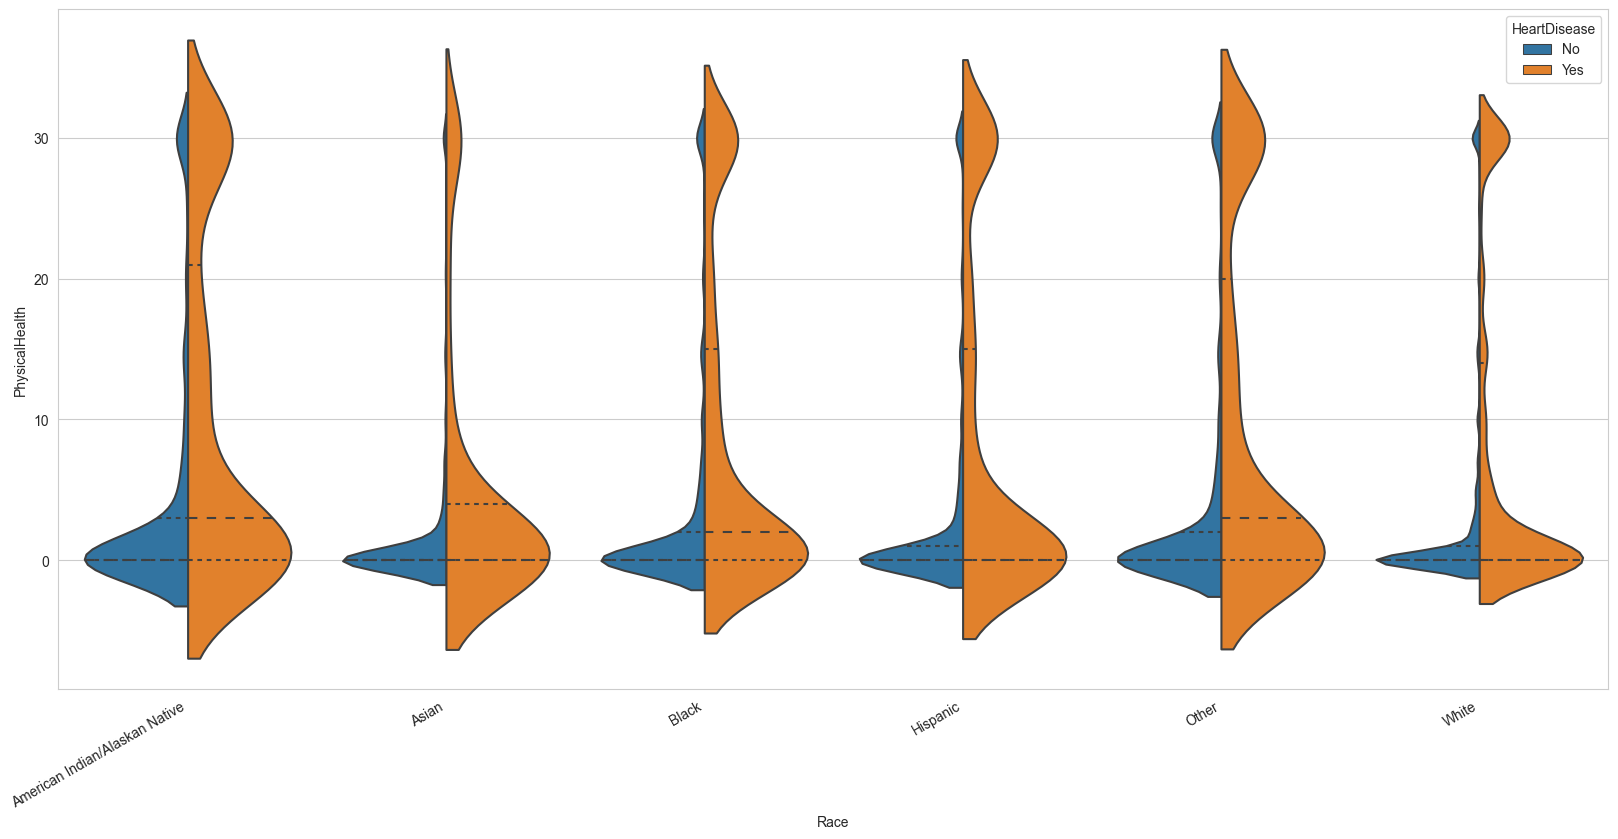

In [39]:
a = df['Race'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Race', y='PhysicalHealth',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

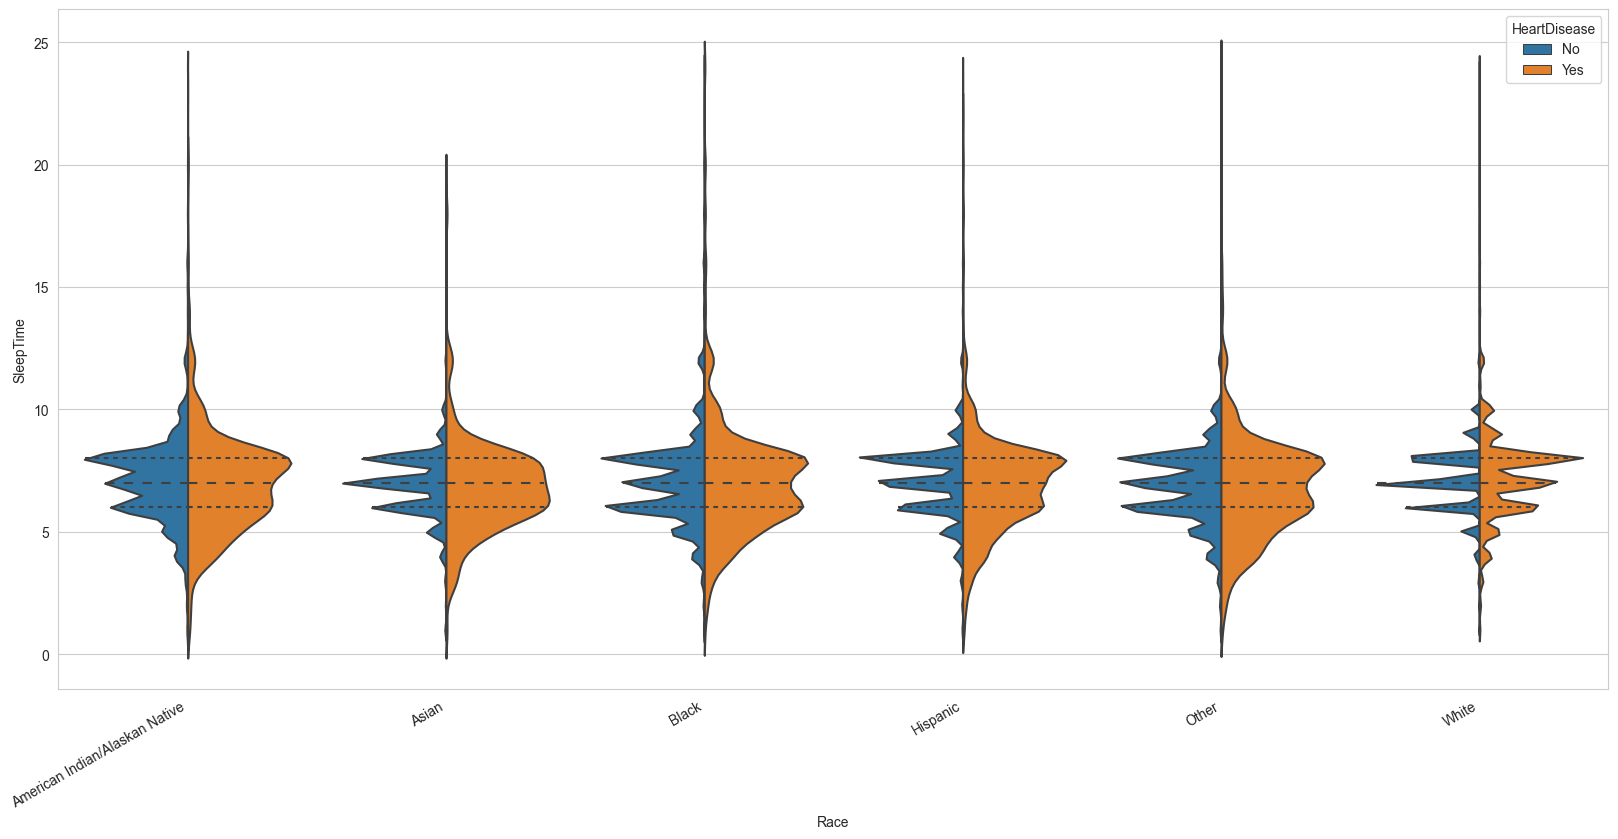

In [40]:
a = df['Race'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Race', y='SleepTime',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

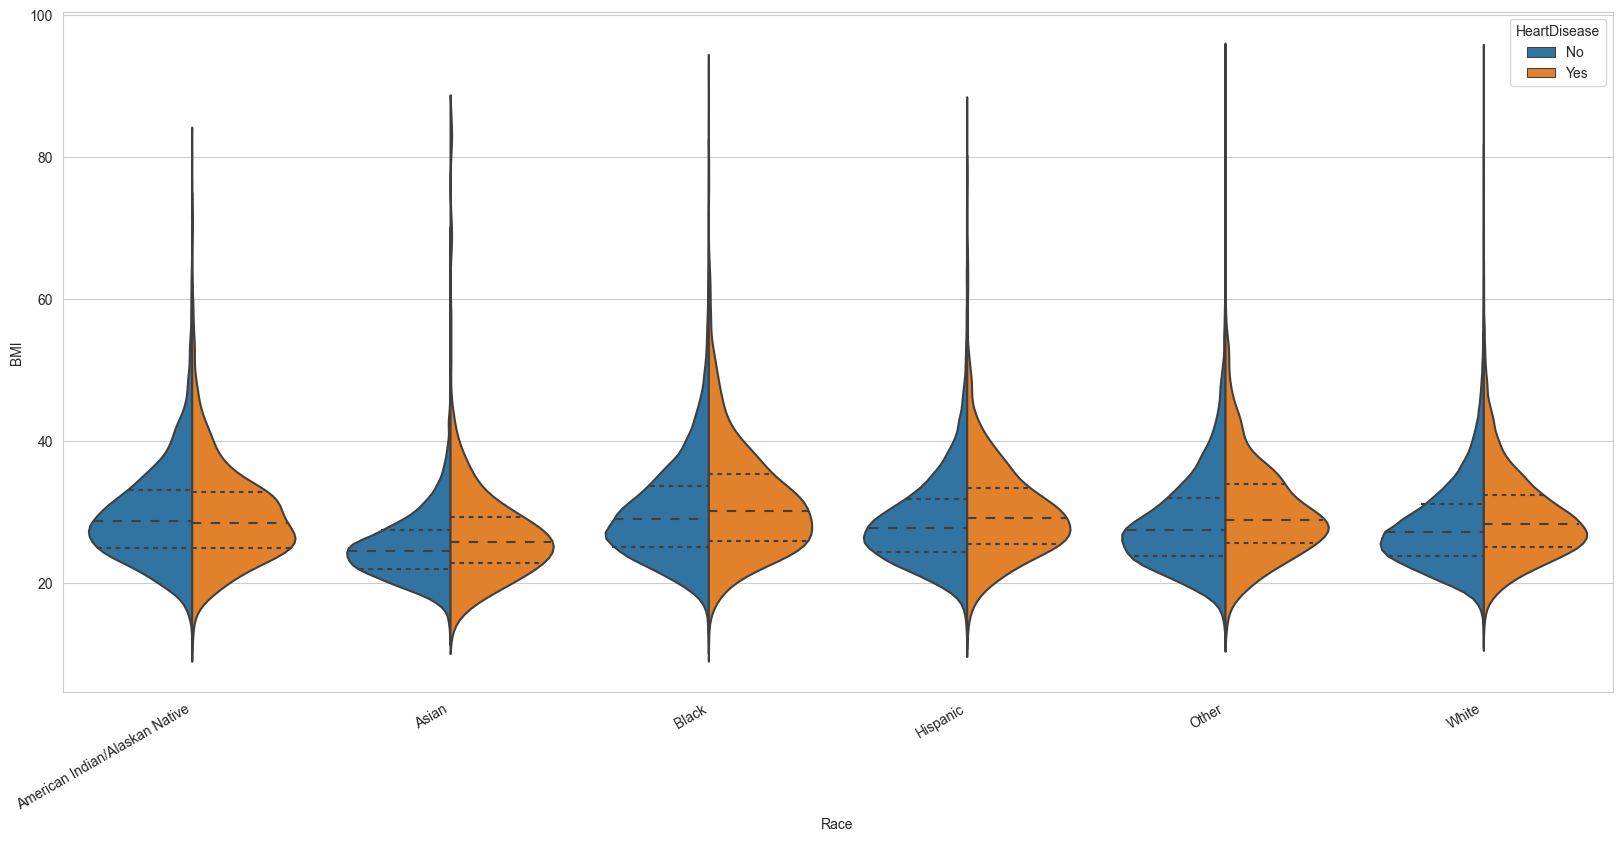

In [41]:
a = df['Race'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Race', y='BMI',hue="HeartDisease", split=True, data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

### Диабет

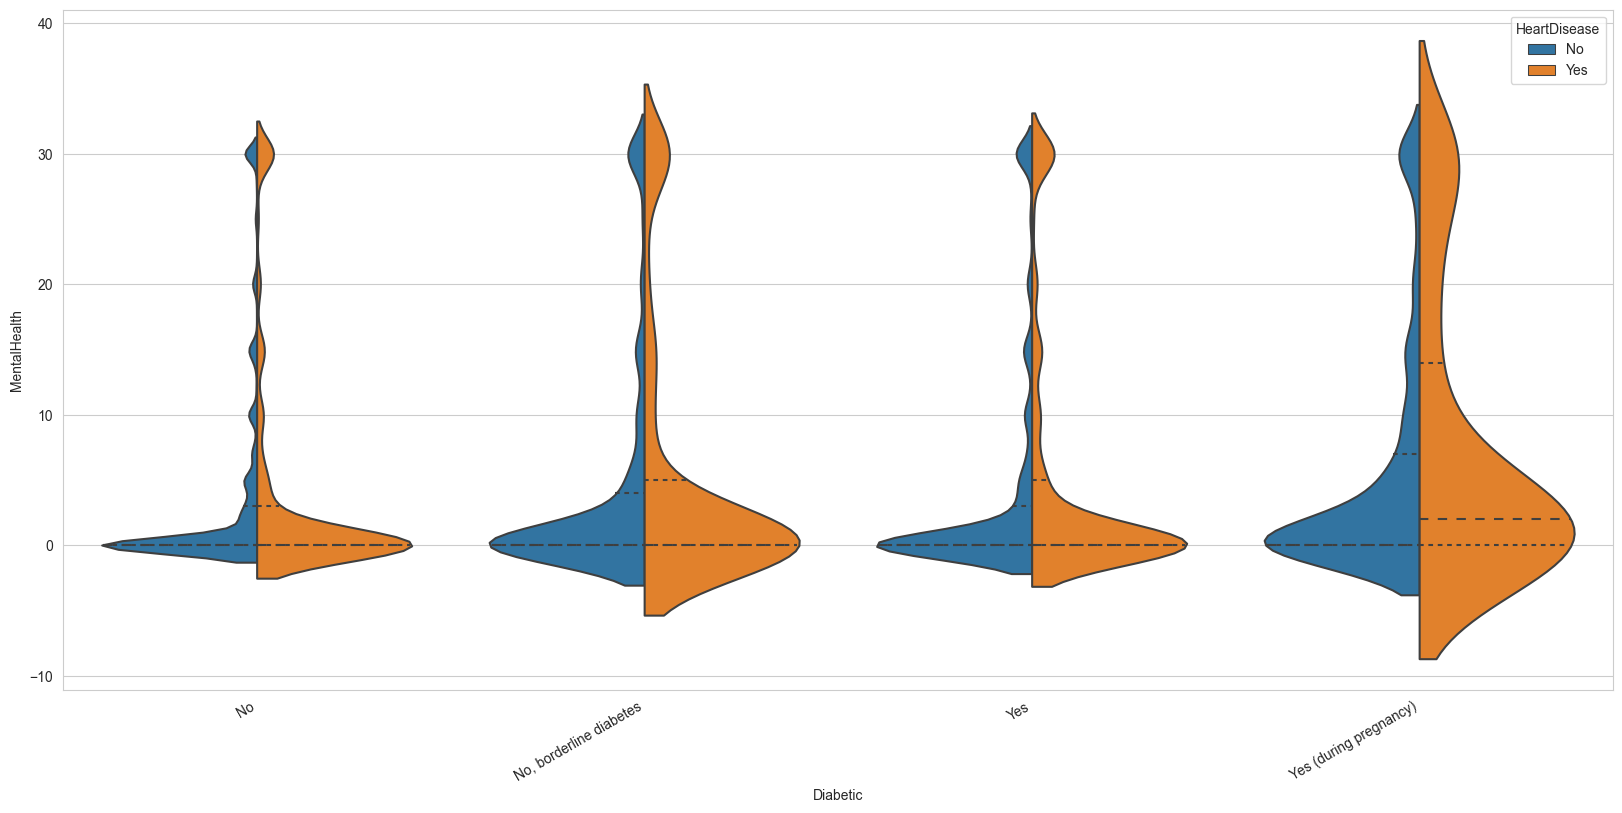

In [42]:
a = df['Diabetic'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Diabetic', y='MentalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

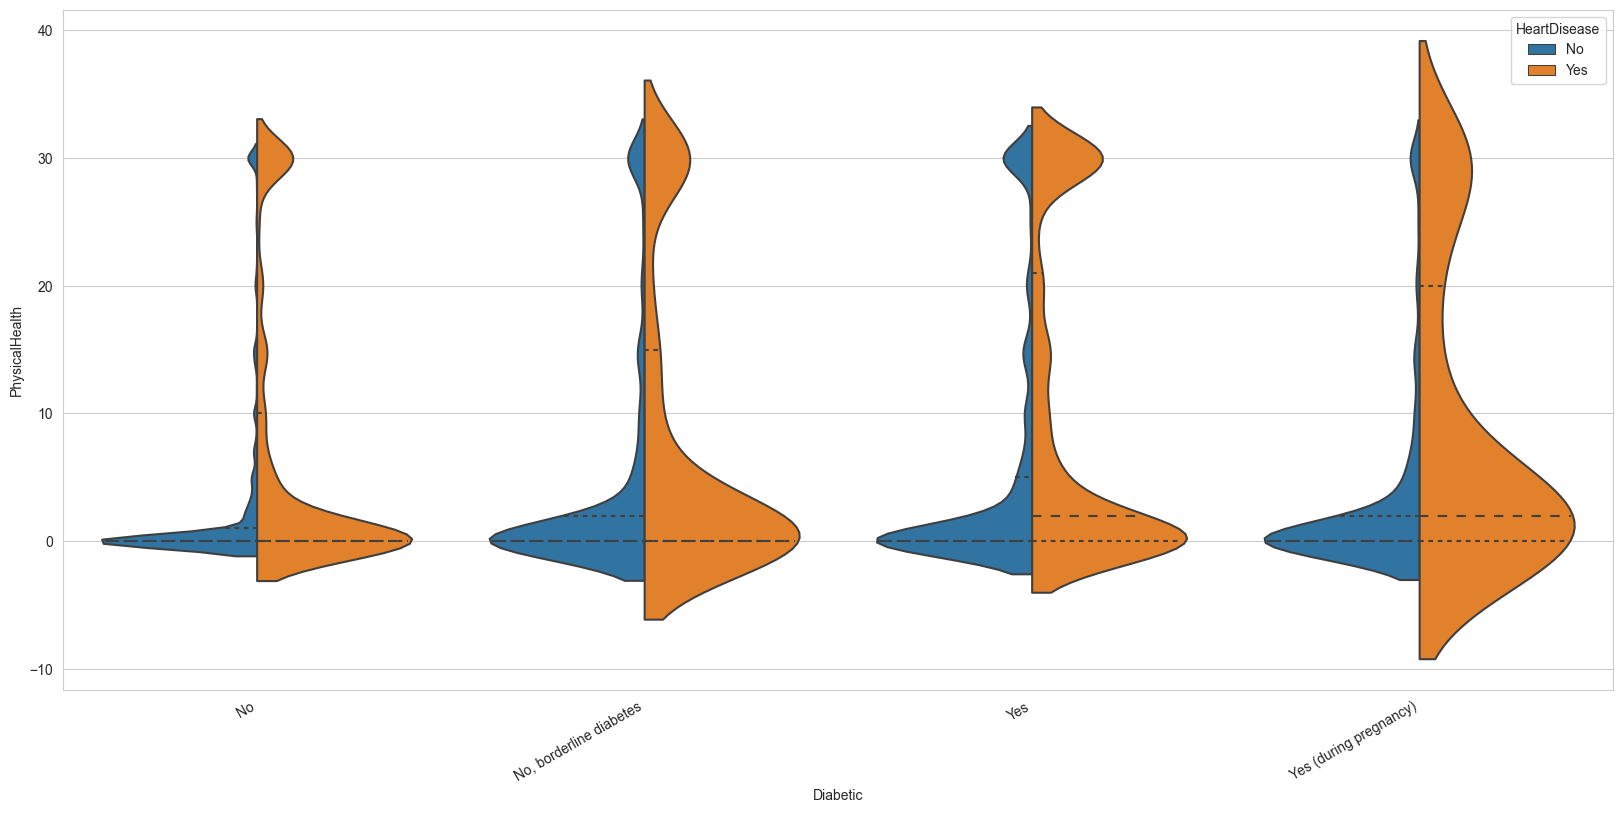

In [43]:
a = df['Diabetic'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Diabetic', y='PhysicalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

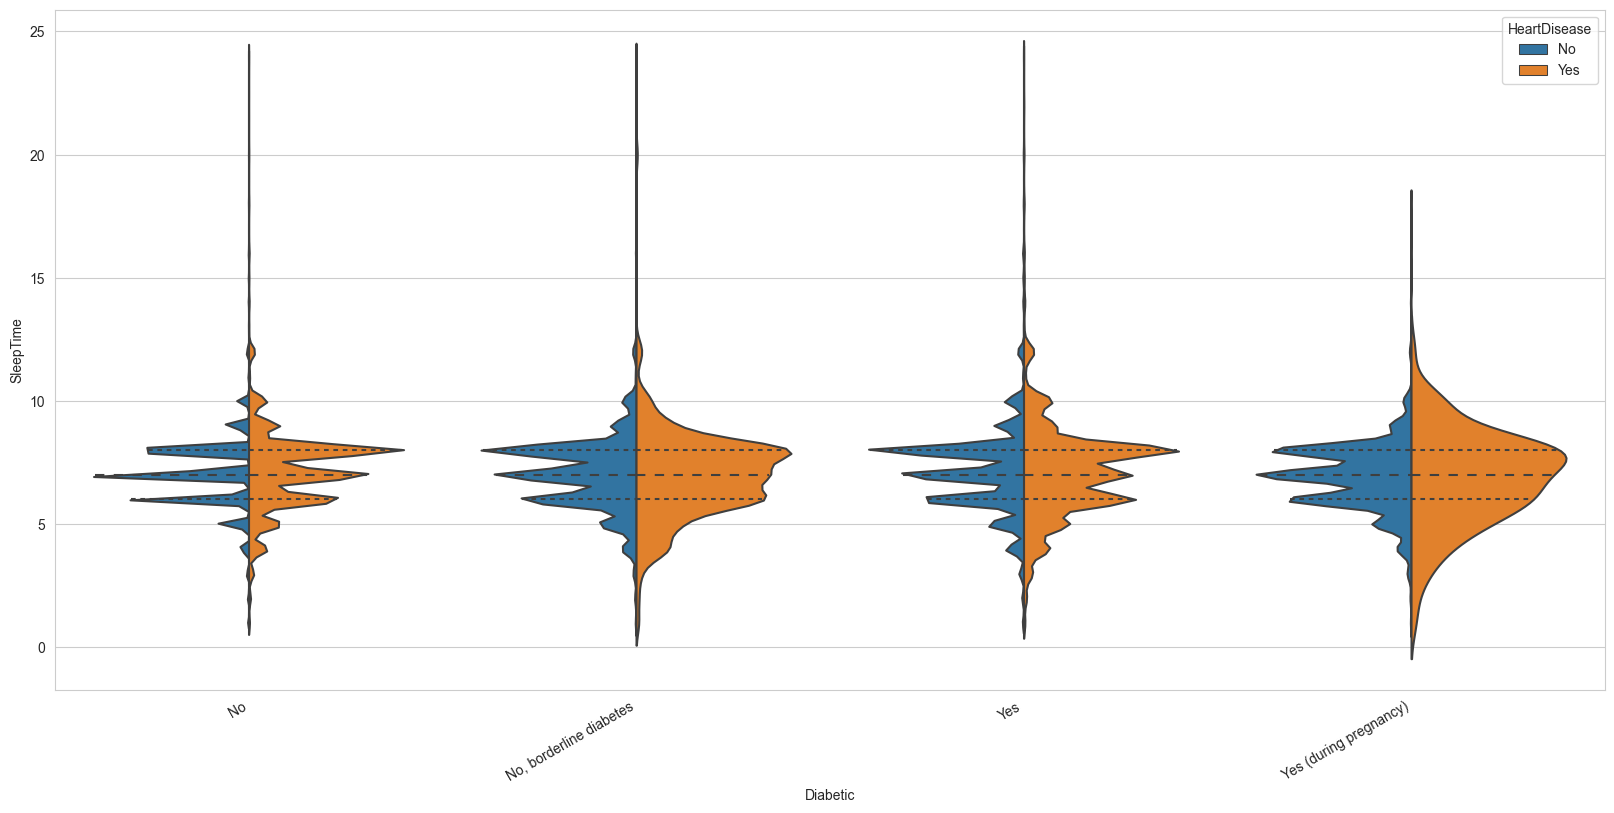

In [44]:
a = df['Diabetic'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Diabetic', y='SleepTime', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

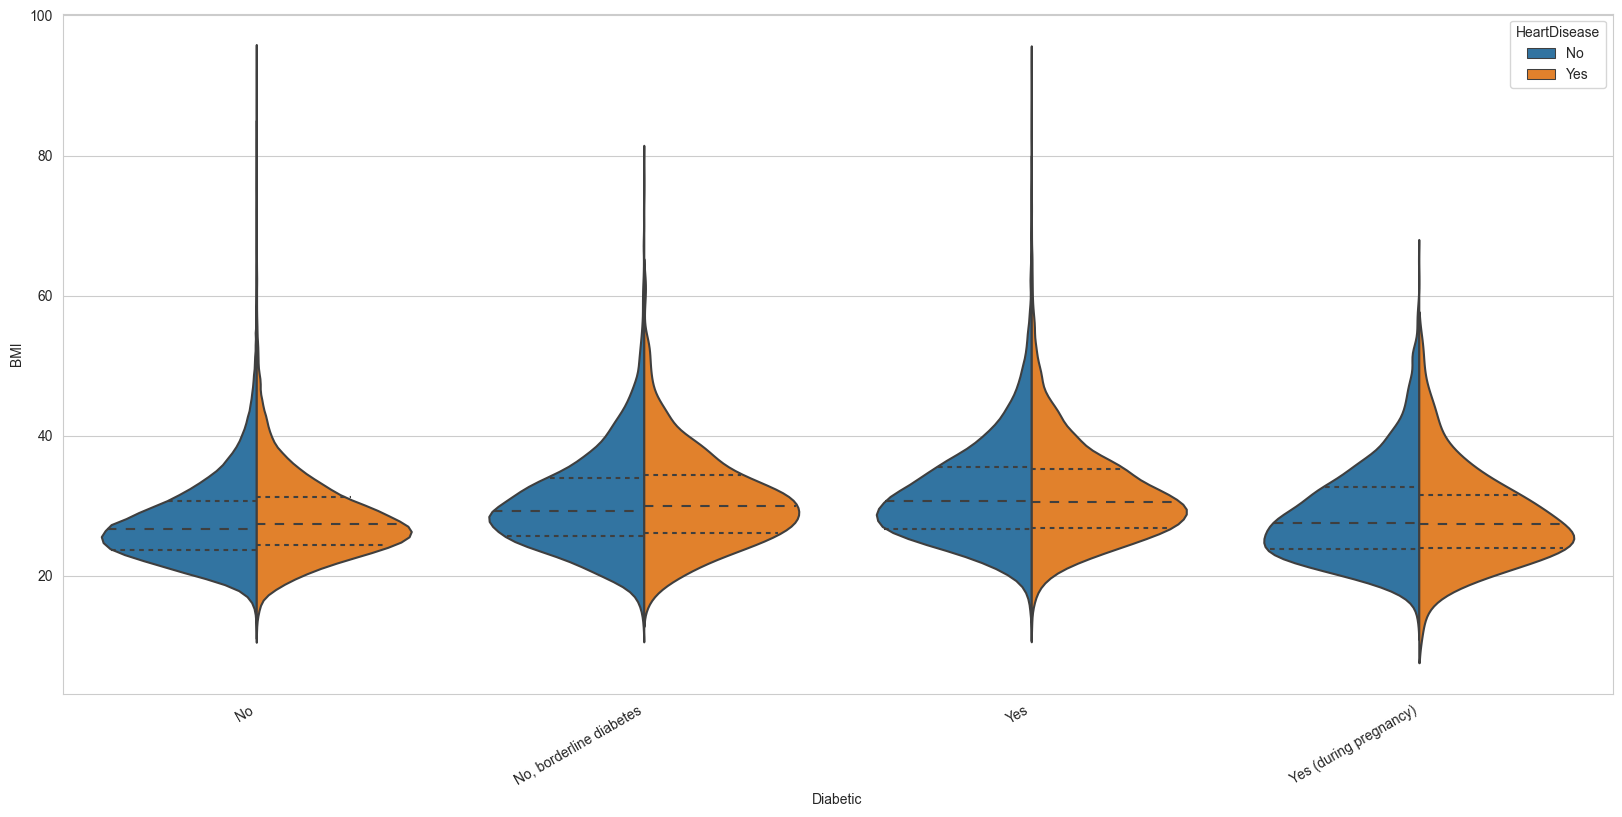

In [45]:
a = df['Diabetic'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Diabetic', y='BMI', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

### Sex

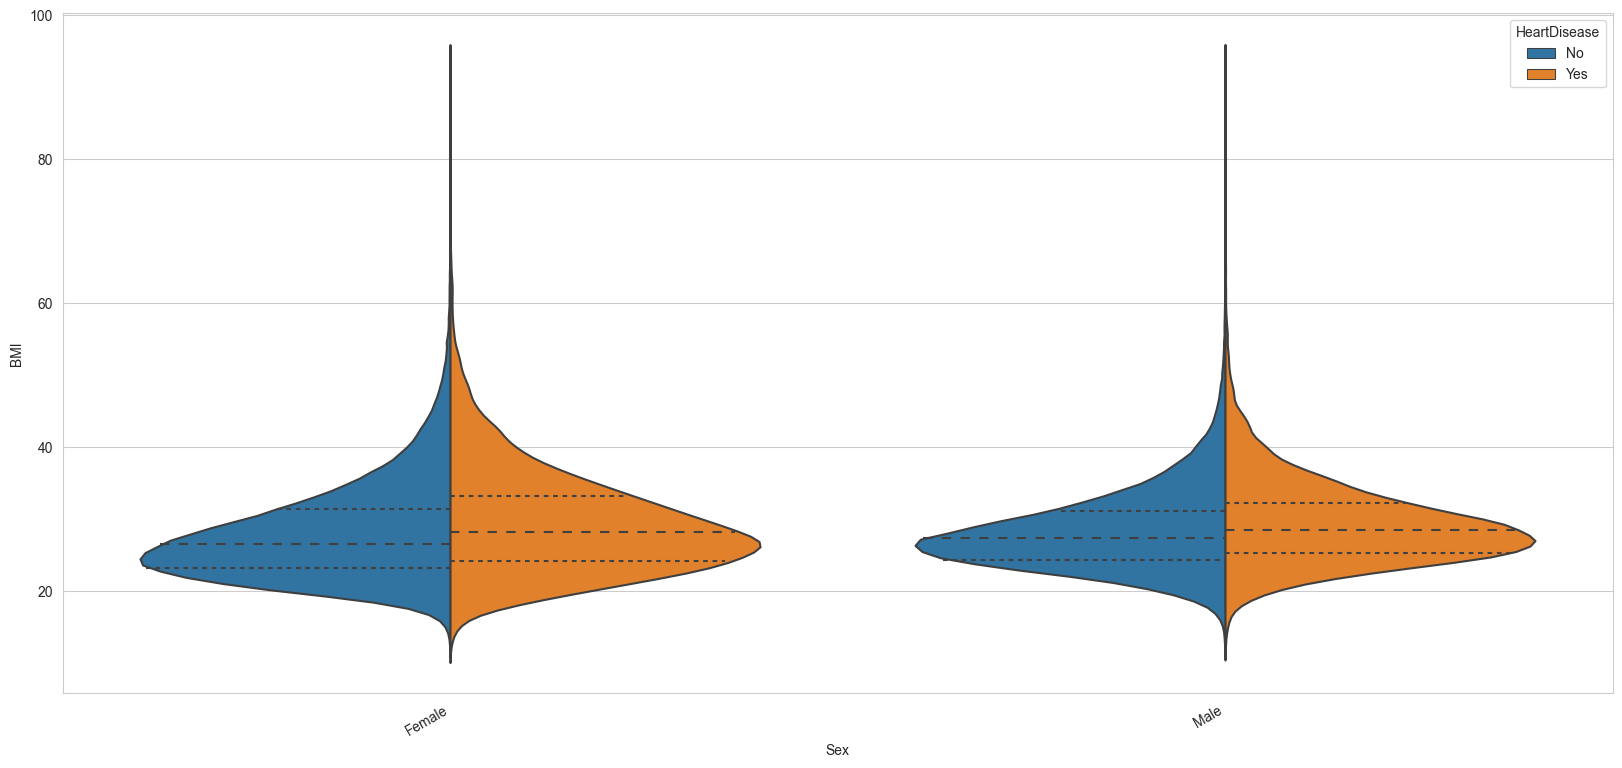

In [46]:
a = df['Sex'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Sex', y='BMI', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

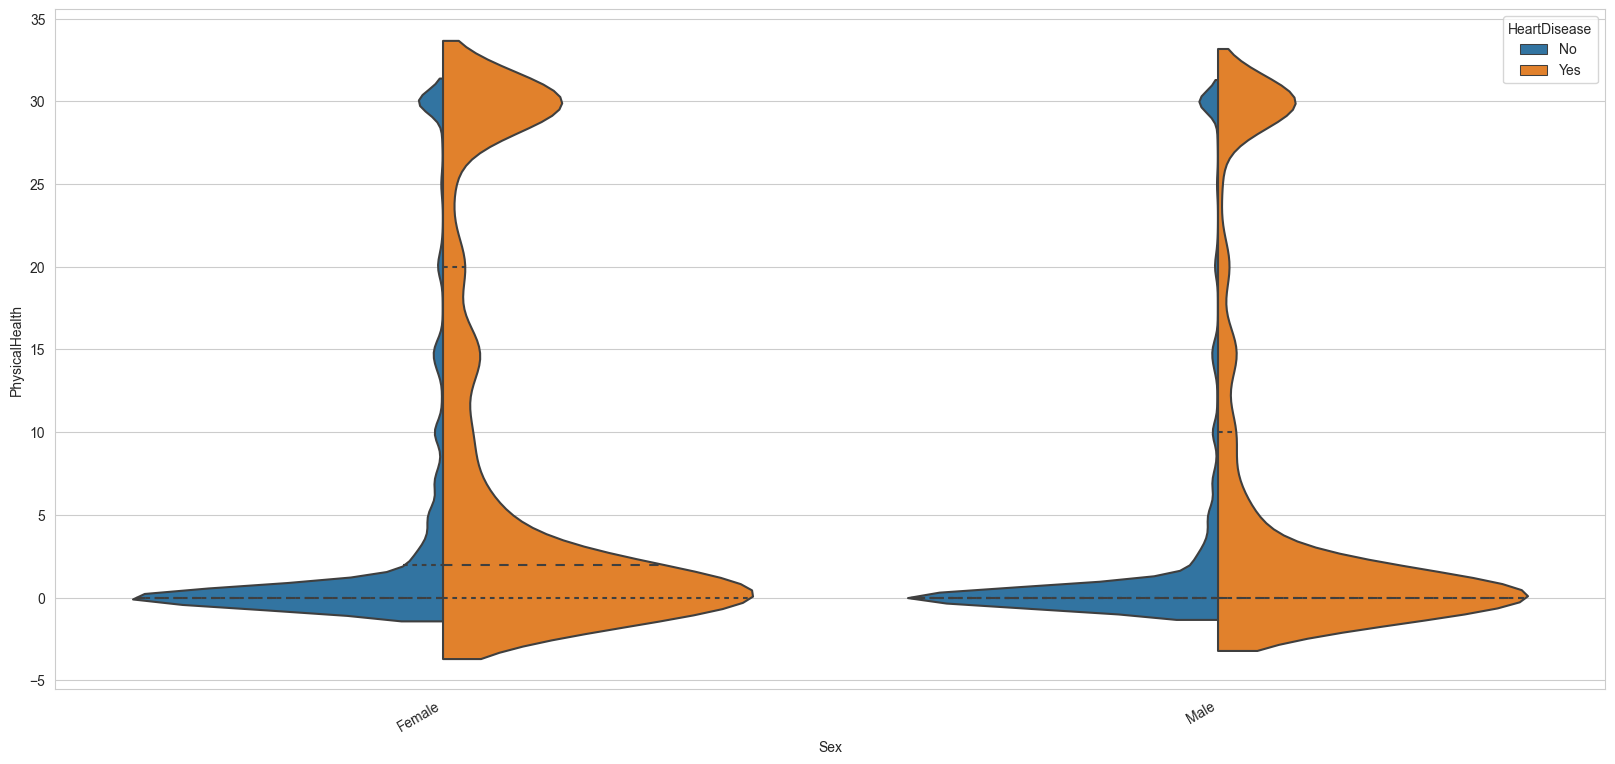

In [47]:
a = df['Sex'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Sex', y='PhysicalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

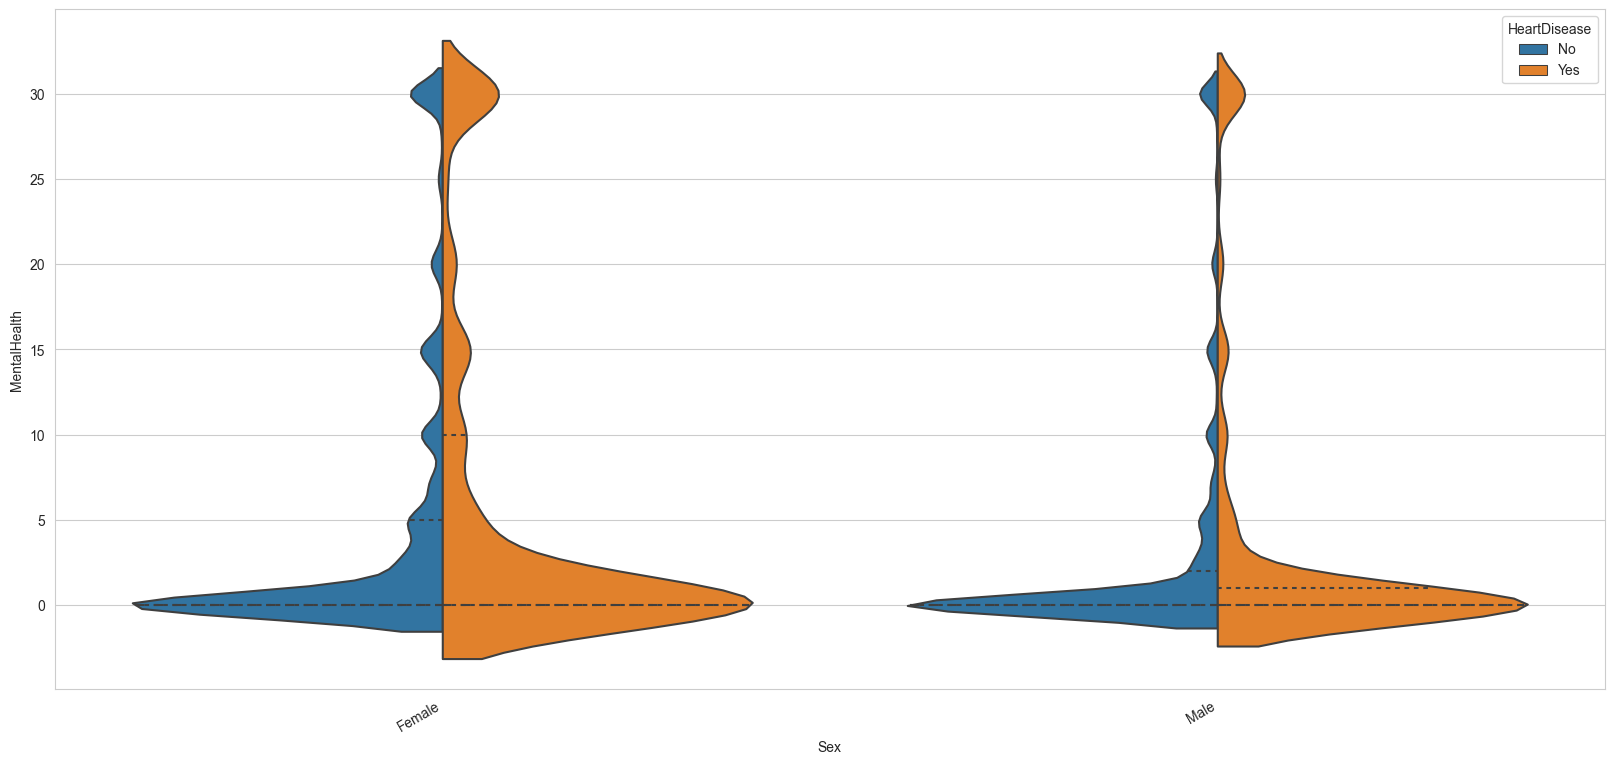

In [48]:
a = df['Sex'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Sex', y='MentalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

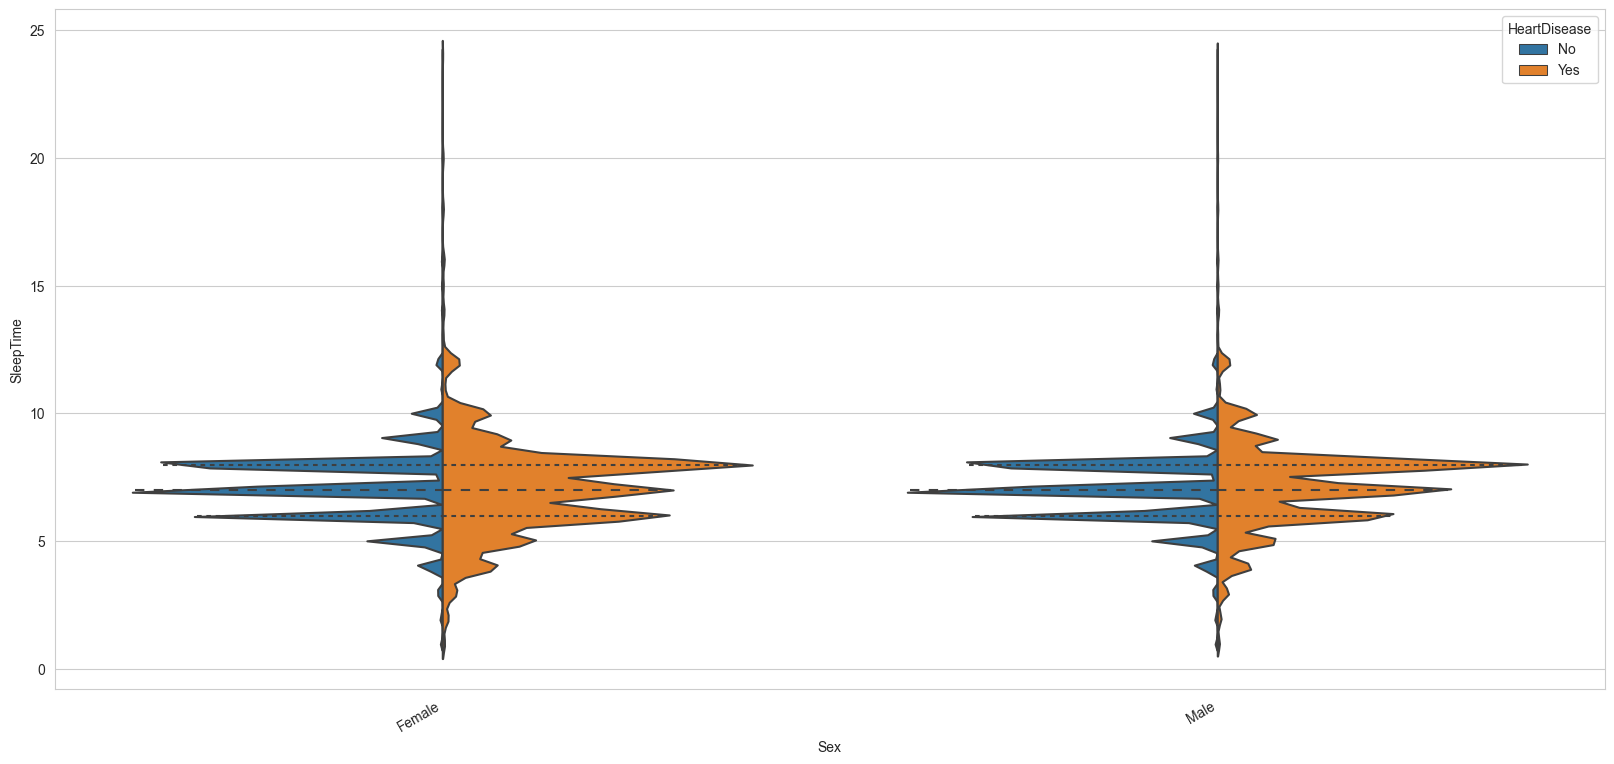

In [49]:
a = df['Sex'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='Sex', y='SleepTime', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

### Physical Activety

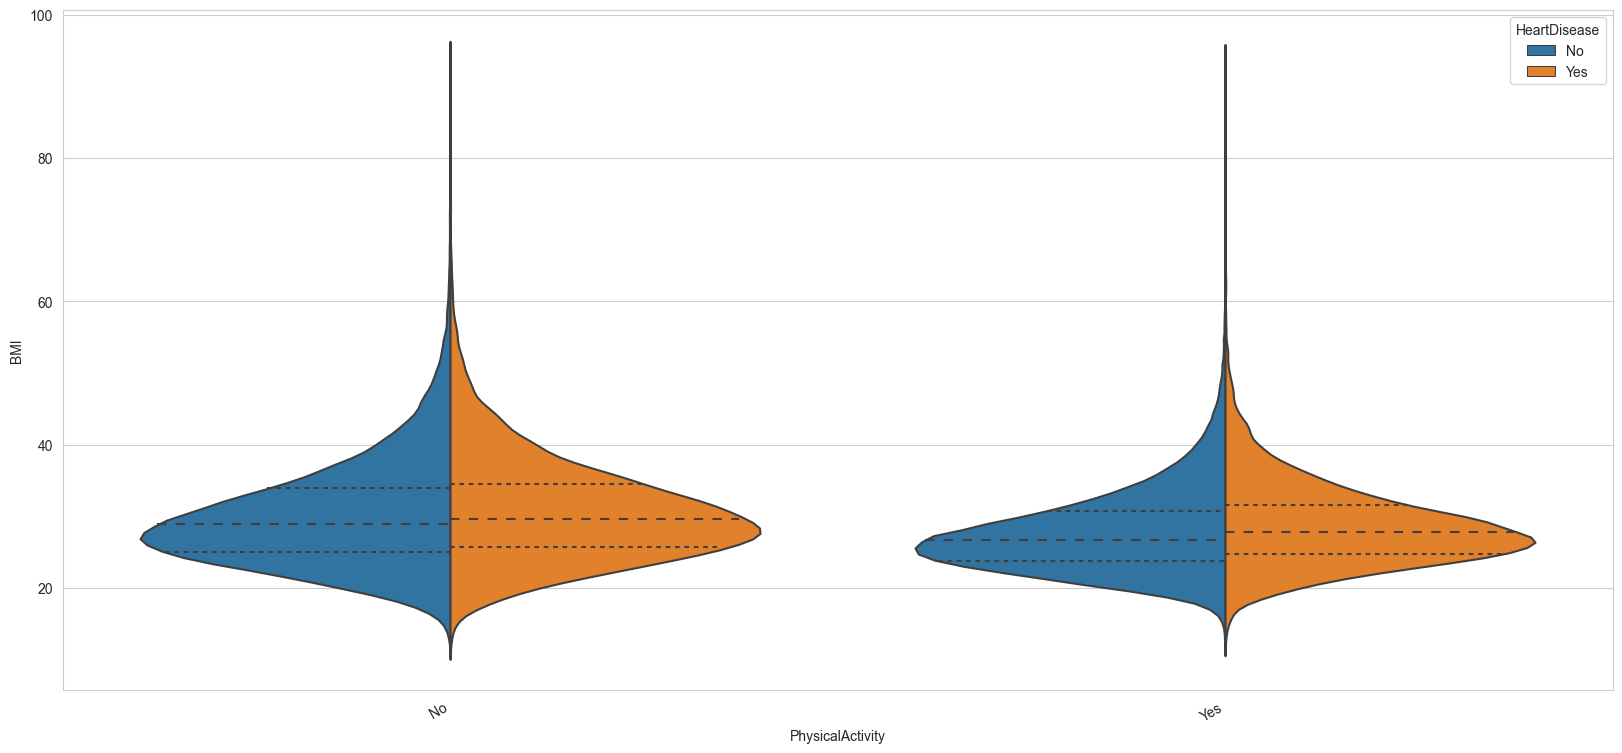

In [50]:
a = df['PhysicalActivity'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='PhysicalActivity', y='BMI', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

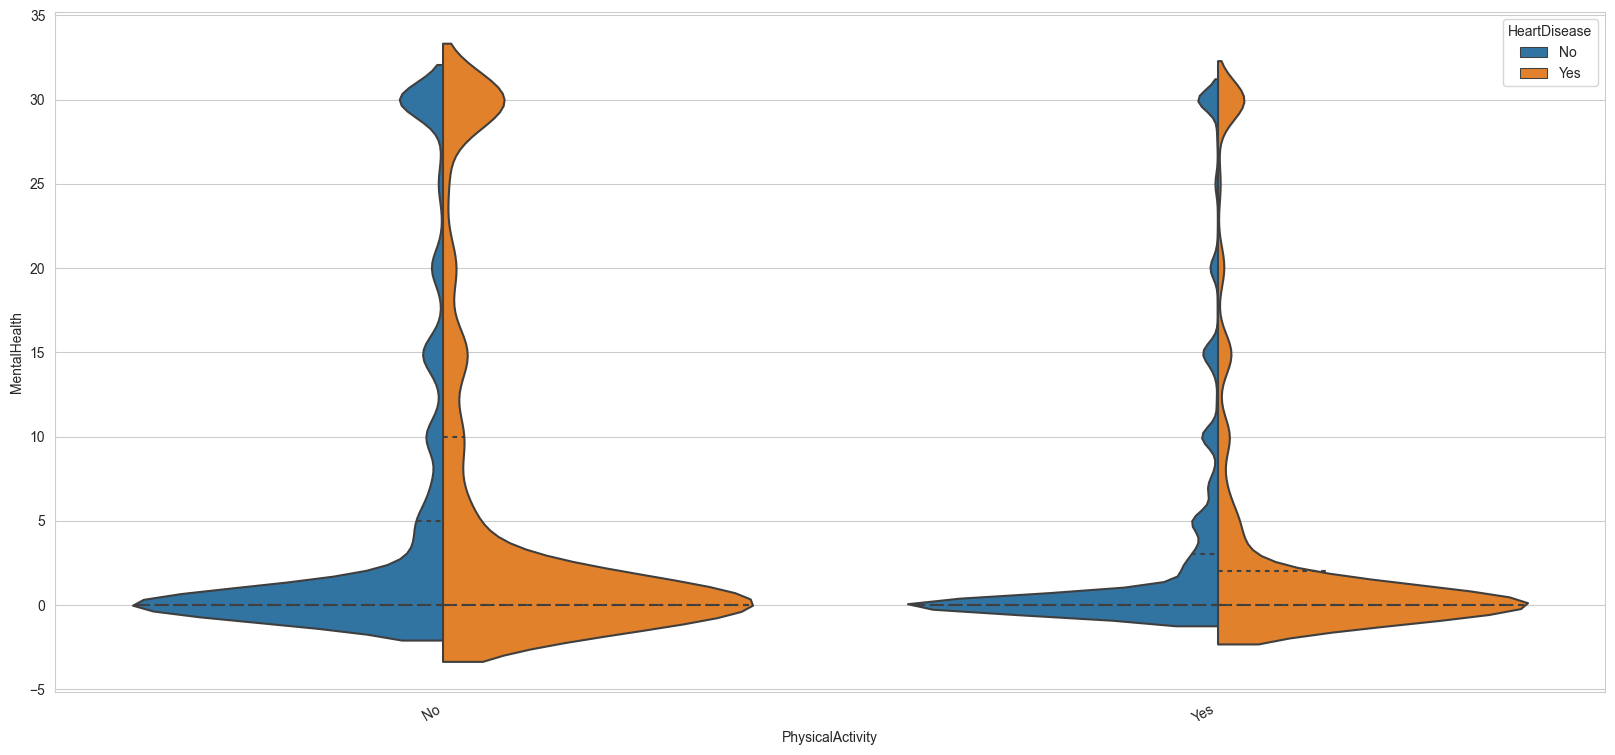

In [51]:
a = df['PhysicalActivity'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='PhysicalActivity', y='MentalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

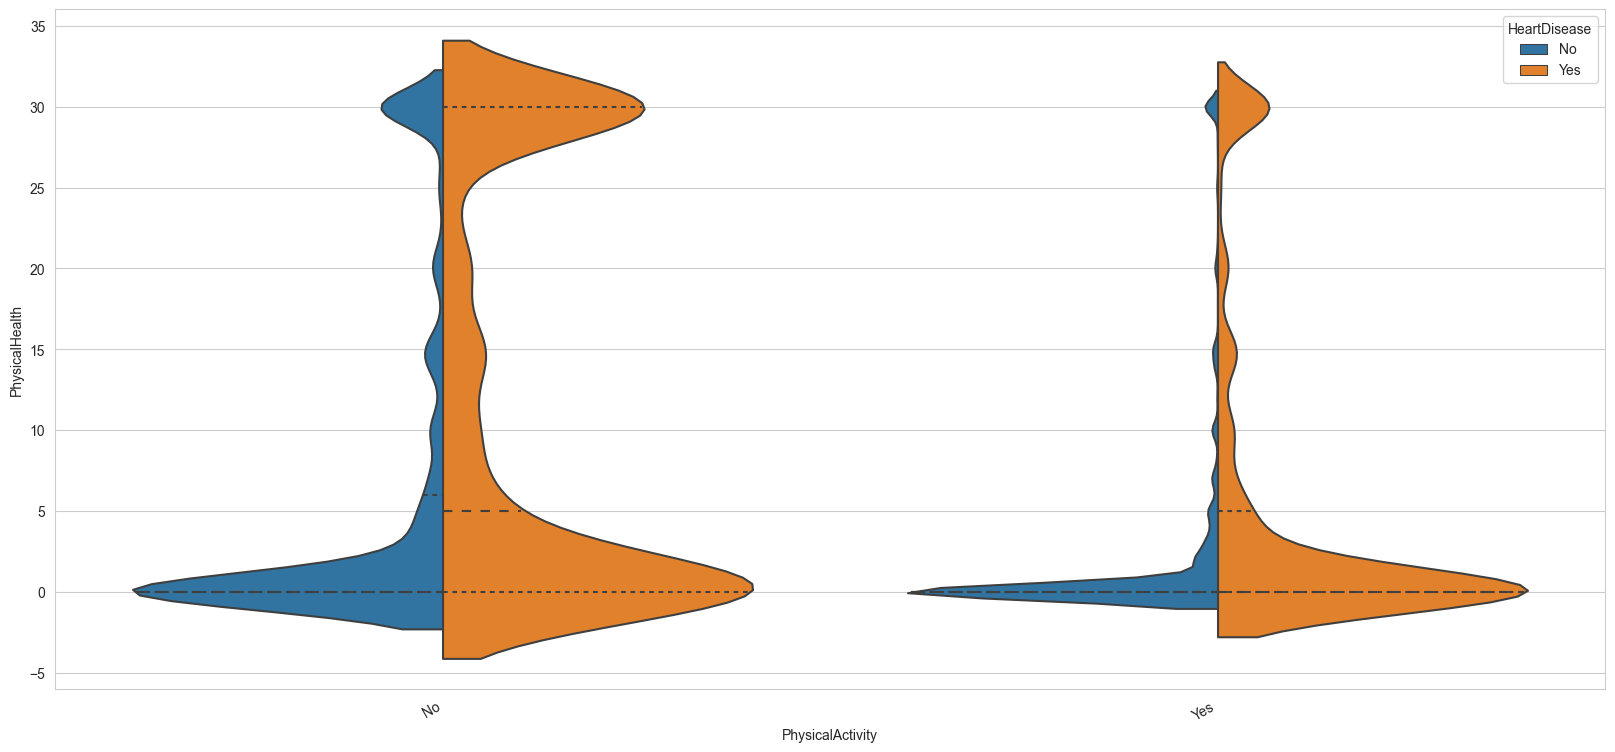

In [52]:
a = df['PhysicalActivity'].unique()
fig = plt.figure(figsize=(20,10), dpi= 100)
sns.violinplot(x='PhysicalActivity', y='PhysicalHealth', hue="HeartDisease", split=True,data=df, scale='width', inner='quartile', order = sorted(a))
fig.autofmt_xdate()

### Alcohol

[Text(0.5, 0, 'AgeCategory'), Text(0, 0.5, 'AlcoholDrinking, %')]

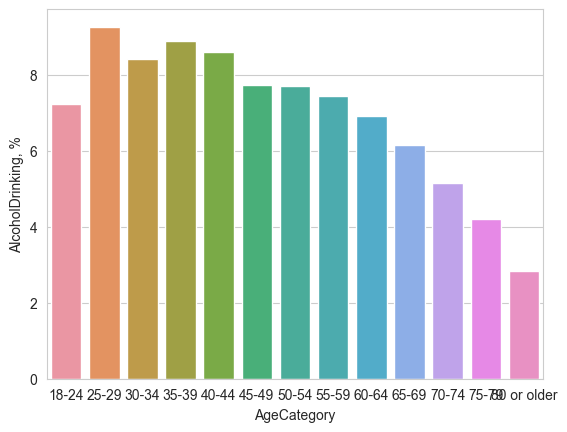

In [53]:
a = df['AgeCategory'].unique()
a.sort()
alco_drunk = []
for i in a:
    df1 = df[df['AgeCategory']==i]
    l1 = len(df1)
    l0 = len(df1[df1['AlcoholDrinking'] == 'Yes'])
    alco_drunk.append(l0/l1*100)
p = sns.barplot(x=a, y = alco_drunk)
p.set(xlabel='AgeCategory', ylabel='AlcoholDrinking, %')